### Check for the execustion time for this notebook in bottom of the page
#### 300.0128333568573 seconds approx

In [215]:
import time  # import time 
# start time 
start_time = time.time()

## 1. Your views about the problem statement?

The problem statement is essentially a weather forecasting problem that involves predicting whether it will rain tomorrow ("RainTomorrow") in Sydney using the provided data. The dataset includes the following columns: Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, and RainTomorrow (which is the target column). 

The Daily Buzz wants to add column of "Weather Oracle" by using machine learning techniques to train a data-driven decision model for predicting "RainTomorrow" to ensure accurate weather forecasts for rain in Sydney. 

The target problem is a categorical variable, which means it's a logistic regression problem where we need to predict "RainTomorrow" as either "Yes" or "No" for upcoming days.

## 2. What will be your approach to solving this task?
**2.1. Data Understanding and Tidying:-** First, to understand the given dataframe "sydney_rain prediction" which contain whether datas for sydney.

**2.2. Data Cleaning and Preprocessing:-** Perform the EDD (Extended Data Dictionary) process to check for missing values and Explore relationships between features and the target variable. As target variable is categorical so best preferal plot to cehck for outliers is box-plot and count-plots to identify the number for categories.

**2.3. Exploratory Data Analysis (EDA):-** EDD treatment for missing values and outliers, if required and also to create dummies values for categorical variables and splitting into dependent and independent variables, and train-test split. 

**2.4. Model Selection:-** As the problem involves predicting a categorical target variable, selecting models such as Logistic Regression, Linear Discriminant Analysis, and K-Nearest Neighbors is suitable.

**&rightarrow; Ensemble methods as-Bagging, Random Forest classification, Gradient Boosting, AdaBoost, and XGBoost can handle both categorical and continuous target variables. Therefore, I will also use these above mentioned models to train and predict the RainTomorrow for upcoming days.**

**2.5. Model Evaluation:-** After training with the selected model, check for performance evaluation metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE),confusion matrix,  accuracy_score, and check for overfitting, and will select the best-performing model among them.

**2.6. Prediction and conclusion:-** Based on the above step will find the best-fit model for the problem statement and also conclude with the accuracy of model fitting.

### 2.1. Data Understanding and Tidying
##### 2.1.1 Importing Numpy, Pandas, Seaborn, and matplot libraries for data intrepretation and visualization

In [216]:
import numpy as np     # Importing Numpy library 
import pandas as pd    # Importing Pandas library 
import seaborn as sns  # Importing Seaborn library 
import matplotlib.pyplot as plt  # Importing Matplot library 

##### 2.1.2 Loading and printing sydney_rain prediction dataframe using pandas library
**&rightarrow; Note:-Change the path location for all the three files**

In [217]:
# Loading and printing cities dataset excel file
sydney_rain = pd.read_excel('E:/PHD ADMISSION/Om Namah Shivay/Data Science/Interview Preparation/Final project/sydney_rain prediction.xlsx', header=0)
print(("\033[1m sydney_rain \033[0m"), "\n", sydney_rain, "\n")

 sydney_rain  
            Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1    2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2    2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3    2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4    2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   
...         ...      ...      ...      ...       ...          ...       ...   
3332 2017-06-21   Sydney      8.6     19.6       0.0          2.0       7.8   
3333 2017-06-22   Sydney      9.3     19.2       0.0          2.0       9.2   
3334 2017-06-23   Sydney      9.4     17.7       0.0          2.4       2.7   
3335 2017-06-24   Sydney     10.1     19.3       0.0          1.4       9.3   
3336 2017-06-25   Sydney      7.6     19.3       0.0          3.4       9.4   

      Humidity9am  Humidity3pm  Pre

### 2.2. Data Cleaning and Preprocessing
##### 2.2.1 EDD (Extended Data Dictionary) process to check for missing values

In [218]:
# To get the information about the "sydney_rain" dataframe, including data types, non-null counts, and memory usage
sydney_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [219]:
# To get the descriptive statistics of the "sydney_rain" numeric columns
sydney_rain.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


##### 2.2.2  By using box-plot we can able to check for outliers for continous variables

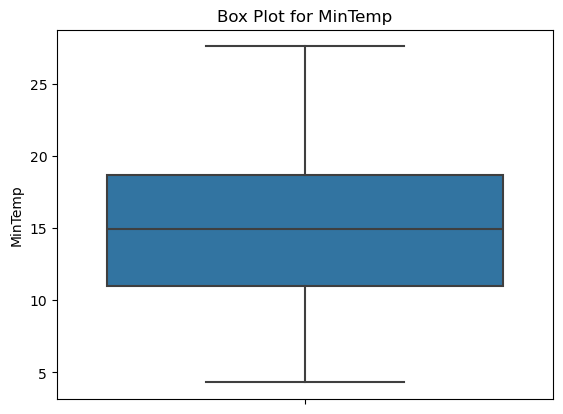

In [220]:
# To visualize the distribution of 'MinTemp' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='MinTemp', data=sydney_rain)
plt.title('Box Plot for MinTemp')
plt.show()

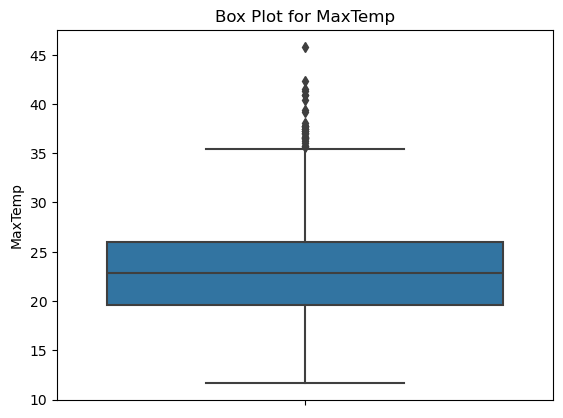

In [221]:
# To visualize the distribution of 'MaxTemp' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='MaxTemp', data=sydney_rain)
plt.title('Box Plot for MaxTemp')
plt.show()

<Axes: ylabel='Rainfall'>

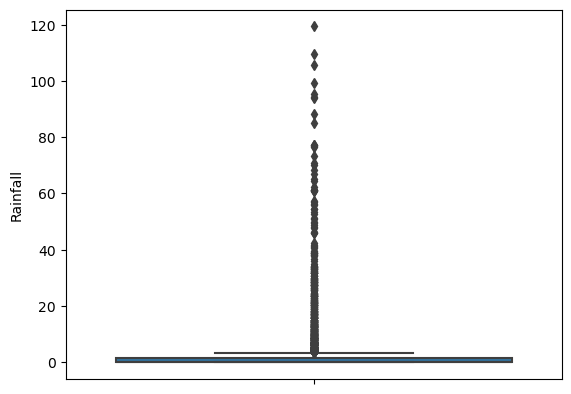

In [222]:
# To visualize the distribution of 'Rainfall' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Rainfall', data=sydney_rain)

<Axes: ylabel='Evaporation'>

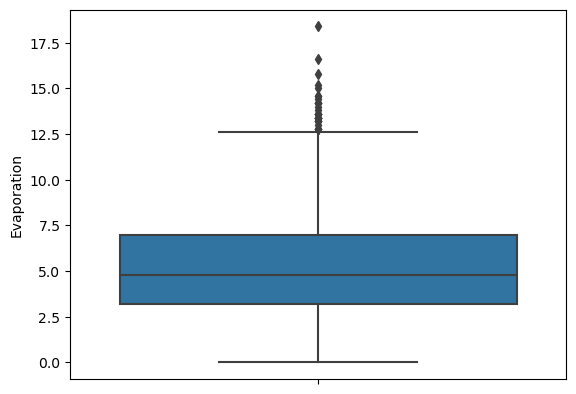

In [223]:
# To visualize the distribution of 'Evaporation' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Evaporation', data=sydney_rain)

<Axes: ylabel='Sunshine'>

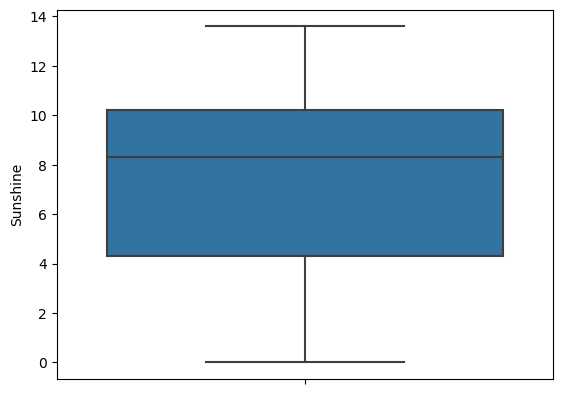

In [224]:
# To visualize the distribution of 'Sunshine' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Sunshine', data=sydney_rain)

<Axes: ylabel='Humidity9am'>

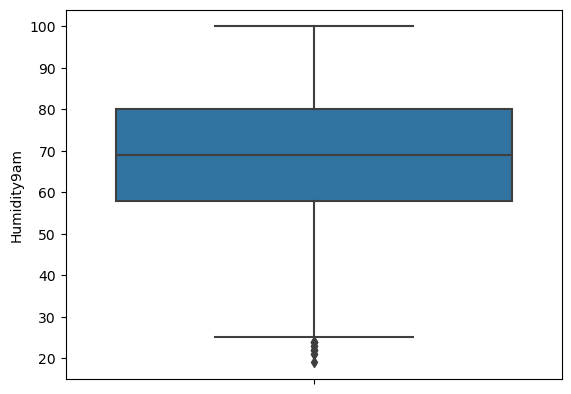

In [225]:
# To visualize the distribution of 'Humidity9am' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Humidity9am', data=sydney_rain)

<Axes: ylabel='Humidity3pm'>

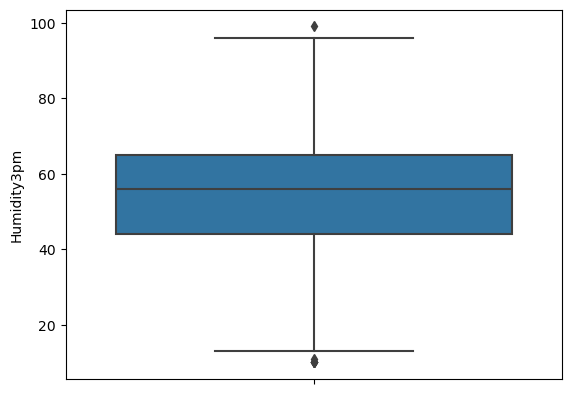

In [226]:
# To visualize the distribution of 'Humidity3pm' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Humidity3pm', data=sydney_rain)

<Axes: ylabel='Pressure9am'>

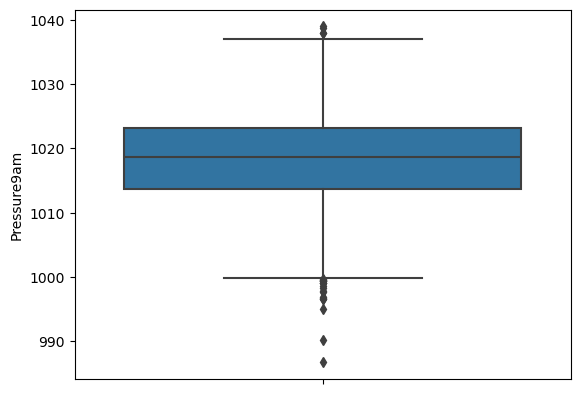

In [227]:
# To visualize the distribution of 'Pressure9am' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Pressure9am', data=sydney_rain)

<Axes: ylabel='Pressure3pm'>

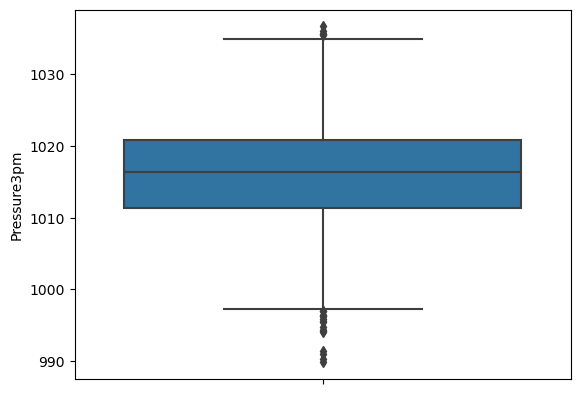

In [228]:
# To visualize the distribution of 'Pressure3pm' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Pressure3pm', data=sydney_rain)

<Axes: ylabel='Temp9am'>

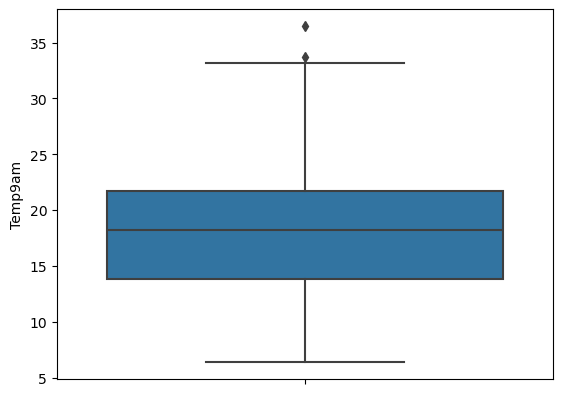

In [229]:
# To visualize the distribution of 'Temp9am' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Temp9am', data=sydney_rain)

<Axes: ylabel='Temp3pm'>

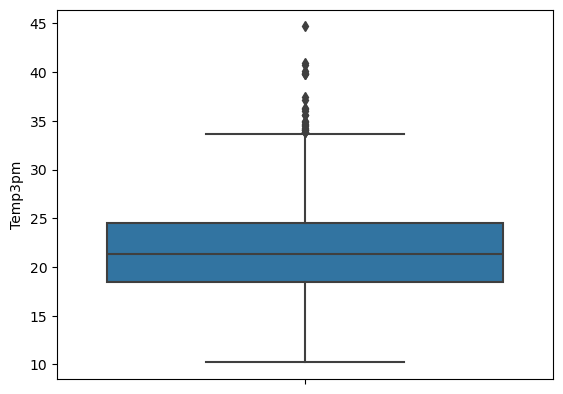

In [230]:
# To visualize the distribution of 'Temp3pm' in the "sydney_rain" dataset and also to check for the outliers
sns.boxplot(y='Temp3pm', data=sydney_rain)

##### 2.2.3 Count-plot to analyse the total counts of categorical varaibles in  "sydney_rain" dataframe

<Axes: xlabel='Cloud9am', ylabel='count'>

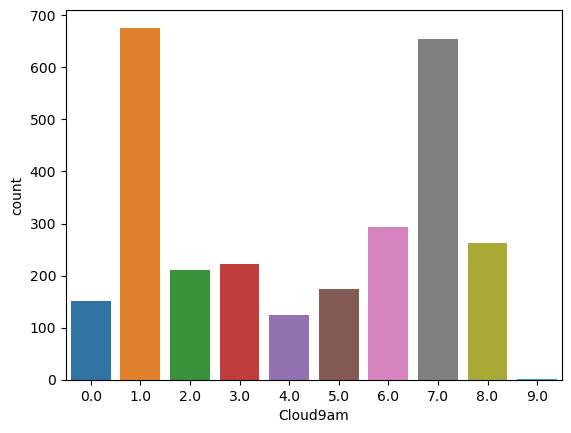

In [231]:
# To check the counts of observations in each categorical "Cloud9am" bins using bar graph
sns.countplot(x='Cloud9am', data = sydney_rain)

<Axes: xlabel='Cloud3pm', ylabel='count'>

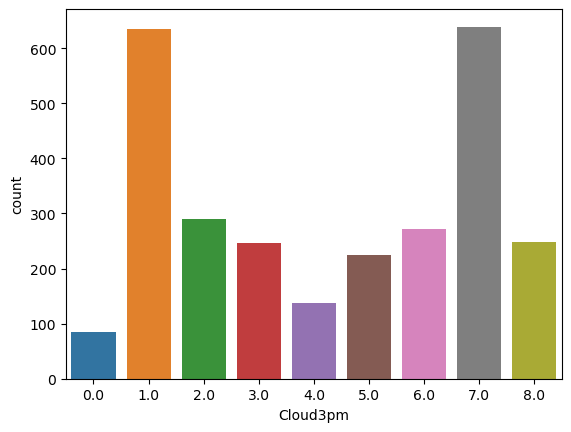

In [232]:
# To check the counts of observations in each categorical "Cloud3pm" bins using bar graph
sns.countplot(x='Cloud3pm', data = sydney_rain)

##### 2.2.4  Checking for skewnwss for "CTC" and "Previous CTC" dataset varaibles in  "sydney_rain" dataframe
**Note-Because of the missing values, initially it shows Skewness value as "NAN", but after doing missing values tretament,  we are getting the skewness values for all historical plots.**

Skewness: nan


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


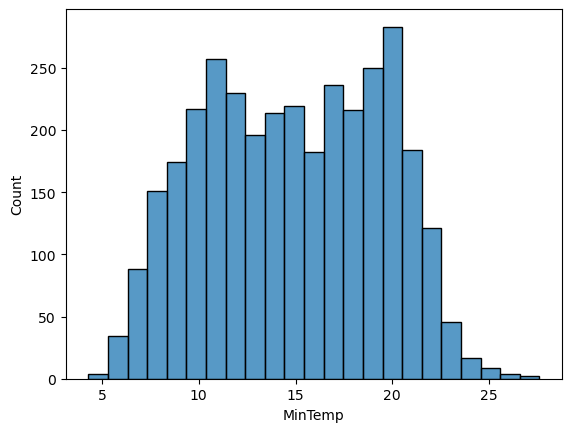

In [233]:
from scipy.stats import skew  # Import skewness model from scipy states model

# Create a histogram for 'MinTemp'
sns.histplot(data=sydney_rain['MinTemp'])

# Calculate and print skewness for 'MinTemp'
skewness = skew(sydney_rain['MinTemp'])
print("Skewness:", skewness)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: nan


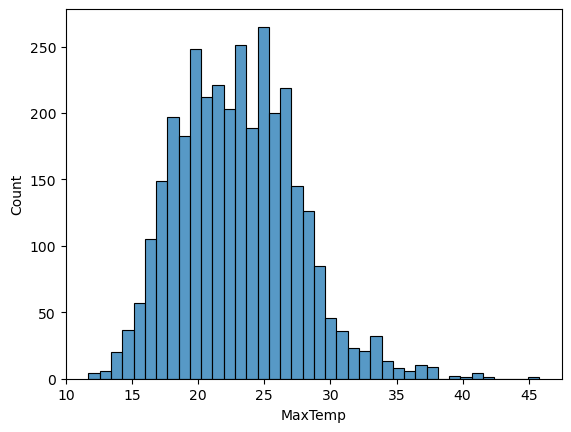

In [234]:
# Create a histogram for 'MaxTemp'
sns.histplot(data=sydney_rain['MaxTemp'])

# Calculate and print skewness for 'MaxTemp'
skewness = skew(sydney_rain['MaxTemp'])
print("Skewness:", skewness)

Skewness: nan


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


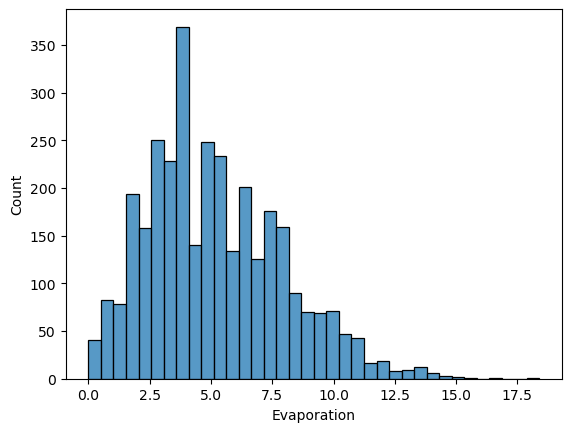

In [235]:
# Create a histogram for 'Evaporation'
sns.histplot(data=sydney_rain['Evaporation'])

# Calculate and print skewness for 'Evaporation'
skewness = skew(sydney_rain['Evaporation'])
print("Skewness:", skewness)

Skewness: nan


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


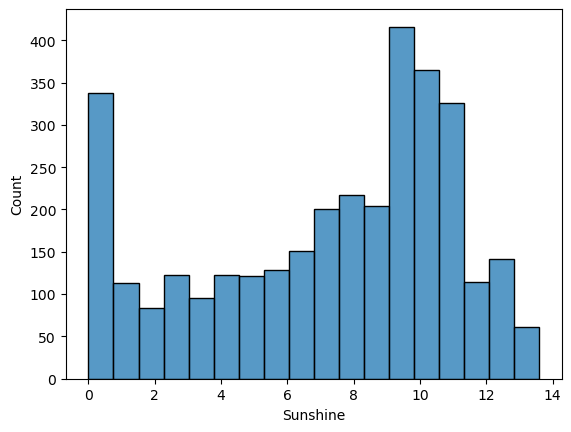

In [236]:
# Create a histogram for 'Sunshine'
sns.histplot(data=sydney_rain['Sunshine'])

# Calculate and print skewness for 'Sunshine'
skewness = skew(sydney_rain['Sunshine'])
print("Skewness:", skewness)

Skewness: nan


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


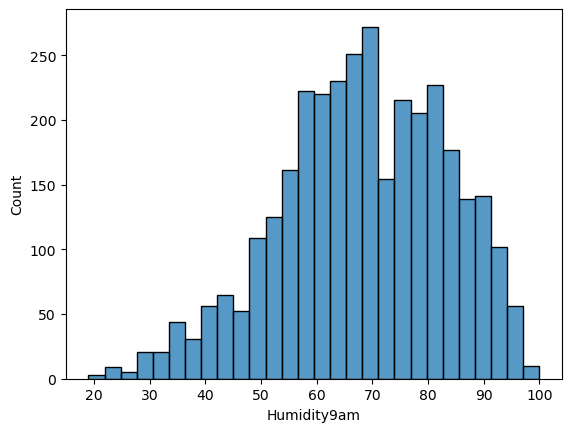

In [237]:
# Create a histogram for 'Humidity9am'
sns.histplot(data=sydney_rain['Humidity9am'])

# Calculate and print skewness for 'Humidity9am'
skewness = skew(sydney_rain['Humidity9am'])
print("Skewness:", skewness)

Skewness: nan


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


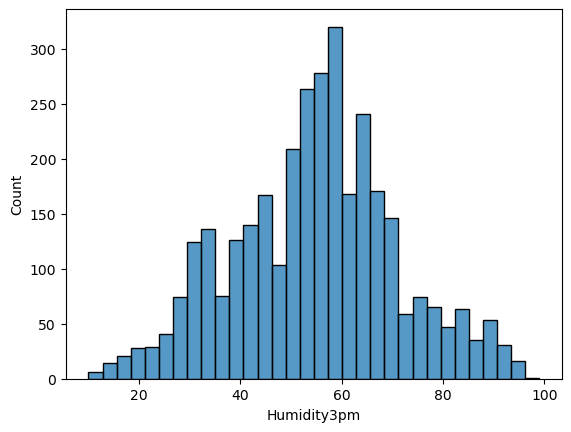

In [238]:
# Create a histogram for 'Humidity3pm'
sns.histplot(data=sydney_rain['Humidity3pm'])

# Calculate and print skewness for 'Humidity3pm'
skewness = skew(sydney_rain['Humidity3pm'])
print("Skewness:", skewness)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: nan


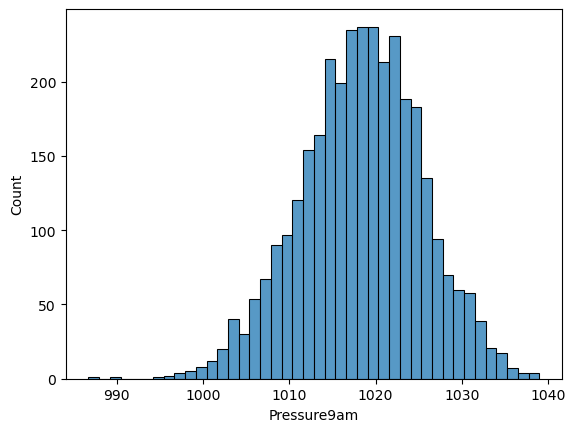

In [239]:
# Create a histogram for 'Pressure9am'
sns.histplot(data=sydney_rain['Pressure9am'])

# Calculate and print skewness for 'Pressure9am'
skewness = skew(sydney_rain['Pressure9am'])
print("Skewness:", skewness)

Skewness: nan


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


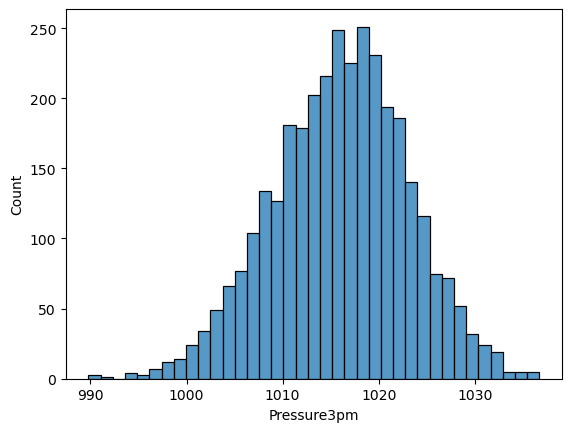

In [240]:
# Create a histogram for 'Pressure3pm'
sns.histplot(data=sydney_rain['Pressure3pm'])

# Calculate and print skewness for 'Pressure3pm'
skewness = skew(sydney_rain['Pressure3pm'])
print("Skewness:", skewness)

Skewness: nan


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


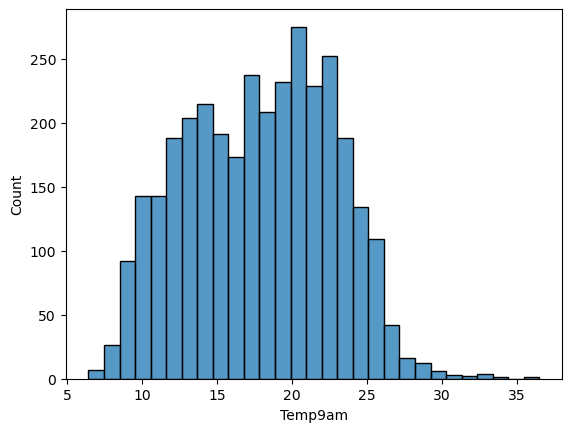

In [241]:
# Create a histogram for 'Temp9am'
sns.histplot(data=sydney_rain['Temp9am'])

# Calculate and print skewness for 'Temp9am'
skewness = skew(sydney_rain['Temp9am'])
print("Skewness:", skewness)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: nan


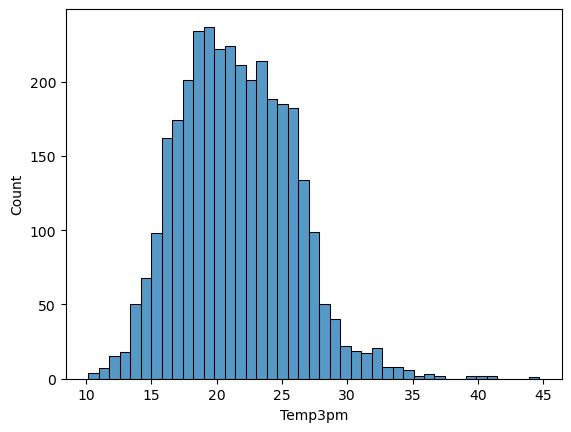

In [242]:
# Create a histogram for 'Temp3pm'
sns.histplot(data=sydney_rain['Temp3pm'])

# Calculate and print skewness for 'Temp3pm'
skewness = skew(sydney_rain['Temp3pm'])
print("Skewness:", skewness)

### Observations after EDD on provided dataset
##### For the missing value obsevation for different columns
&rightarrow; There are Missing values in MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, and RainToday columns of sydney_rain dataset.

&rightarrow; "Cloud9am" and "Cloud3pm" are float type data (4.0) so i round off the mean value for both columns and repersent that with float data type

&rightarrow; "Rain Today" contain "Yes" and "No" values as its categorical datas, so while missing treatment i will assign "Yes" for the NAN value to improve our model accuracy.

**Note1-Because of the missing values for above mentioned columns, initially i got "Skewness=NAN", but after doing missing values tretament, for fruther execution od code we are getting the skewness values for above historical plots.**

##### For the outliers in varaiable, box-plots gives proper visualizatuions
&rightarrow; There are outliers showing in MaxTemp, Rainfall, Evaporation, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, and Temp3pm.

**Note2-For Rainfall, by using box-plot, its showing the excessive outliers are present**

##### For the count of categorical datas, count-plots gives proper visualizatuions
&rightarrow; There are only one value as "9" in "Cloud9am" so we can replace that one particular value with "8".

&rightarrow; Measured in “oktas” for "1" and "7" is more in compare to others oktas for both "Cloud9am" and "Cloud3pm.

##### Checking for skewnwss for "CTC" and "Previous CTC" dataset
&rightarrow; **Positive/Left Skewed:-**-"Evaporation" shows positive skewness.

&rightarrow; **Negative/Right Skewed:-**-"Humidity9am" shows negative skewness.

&rightarrow; **Symmetric/Not Skewed:-**-"MaxTemp", "Pressure9am", "Pressure3pm", "Temp3pm", Humidity3pm" are almost perfectly distributed, that means there are no skewness.

&rightarrow; **Bimodel distribution:-**-"MinTemp", "Temp9am", are Bi-model distribution.

&rightarrow; **Unitary distribution:-**-"Sunshine" have almost unitary distribution.

##### Date column contain data in "Datetime64" format
&rightarrow; Need to convert data type of "Date" Column from "datetime64" to "Float"

&rightarrow; After converting as value is too high in compare to others columns so, after splitting into "x" and "y" variable, it need to standard transformation for "x" sets of data

### 2.3. Exploratory Data Analysis (EDA)
##### 2.3.1 Missing value treatement for MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, and RainToday

In [243]:
# Missing value treatment with the mean of the "MinTemp" column in "sydney_rain" dataframe
sydney_rain.MinTemp = sydney_rain.MinTemp.fillna(sydney_rain.MinTemp.mean())

In [244]:
# Missing value treatment with the mean of the "MaxTemp" column in "sydney_rain" dataframe
sydney_rain.MaxTemp = sydney_rain.MaxTemp.fillna(sydney_rain.MaxTemp.mean())

In [245]:
# Missing value treatment with the mean of the "Rainfall" column in "sydney_rain" dataframe
sydney_rain.Rainfall = sydney_rain.Rainfall.fillna(sydney_rain.Rainfall.mean())

In [246]:
# Missing value treatment with the mean of the "Evaporation" column in "sydney_rain" dataframe
sydney_rain.Evaporation = sydney_rain.Evaporation.fillna(sydney_rain.Evaporation.mean())

In [247]:
# Missing value treatment with the mean of the "Sunshine" column in "sydney_rain" dataframe
sydney_rain.Sunshine = sydney_rain.Sunshine.fillna(sydney_rain.Sunshine.mean())

In [248]:
# Missing value treatment with the mean of the "Humidity9am" column in "sydney_rain" dataframe
sydney_rain.Humidity9am = sydney_rain.Humidity9am.fillna(sydney_rain.Humidity9am.mean())

In [249]:
# Missing value treatment with the mean of the "Humidity3pm" column in "sydney_rain" dataframe
sydney_rain.Humidity3pm = sydney_rain.Humidity3pm.fillna(sydney_rain.Humidity3pm.mean())

In [250]:
# Missing value treatment with the mean of the "Pressure9am" column in "sydney_rain" dataframe
sydney_rain.Pressure9am = sydney_rain.Pressure9am.fillna(sydney_rain.Pressure9am.mean())

In [251]:
# Missing value treatment with the mean of the "Pressure3pm" column in "sydney_rain" dataframe
sydney_rain.Pressure3pm = sydney_rain.Pressure3pm.fillna(sydney_rain.Pressure3pm.mean())

In [252]:
# Missing value treatment with the mean of the "Cloud9am" column in "sydney_rain" dataframe
sydney_rain.Cloud9am = sydney_rain.Cloud9am.fillna(float(round(sydney_rain.Cloud9am.mean())))

In [253]:
# Missing value treatment with the mean of the "Cloud3pm" column in "sydney_rain" dataframe
sydney_rain.Cloud3pm = sydney_rain.Cloud3pm.fillna(float(round(sydney_rain.Cloud3pm.mean())))

In [254]:
# Missing value treatment with the mean of the "Temp9am" column in "sydney_rain" dataframe
sydney_rain.Temp9am = sydney_rain.Temp9am.fillna(sydney_rain.Temp9am.mean())

In [255]:
# Missing value treatment with the mean of the "Temp3pm" column in "sydney_rain" dataframe
sydney_rain.Temp3pm = sydney_rain.Temp3pm.fillna(sydney_rain.Temp3pm.mean())

##### 2.3.2 Missing value treatement for "RainToday" with the string "Yes" and replac "9" with "8" in "Cloud9am"

In [256]:
# Missing value treatment with the string 'Yes' in the "RainToday" column in "sydney_rain" dataframe
sydney_rain.RainToday = sydney_rain.RainToday.fillna('Yes')

In [257]:
# Replace the string '9' with '8' in the Cloud9am column
sydney_rain['Cloud9am'] = sydney_rain['Cloud9am'].astype(str).replace('9.0', '8.0').astype(float)

In [258]:
# After missing values treatment, get the information about the "sydney_rain" dataframe, including data types, non-null counts
sydney_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

<Axes: xlabel='Cloud9am', ylabel='count'>

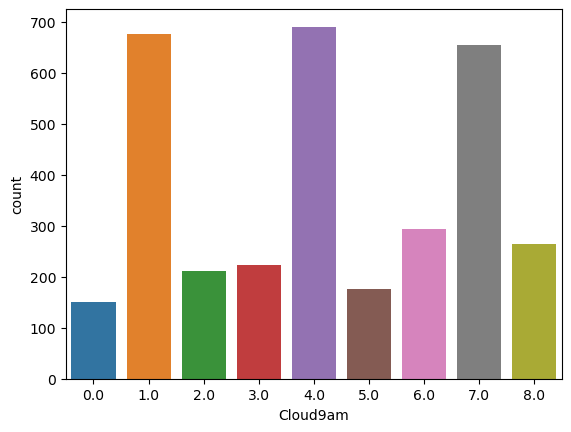

In [259]:
# To check the counts of observations in each categorical "Cloud3pm" bins using bar graph
sns.countplot(x='Cloud9am', data = sydney_rain)

##### 2.3.3 Outliers treatement for MaxTemp, Rainfall, Evaporation, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, and Temp3pm.

Lower Bound: 10.000000000000004, Upper Bound: 35.599999999999994


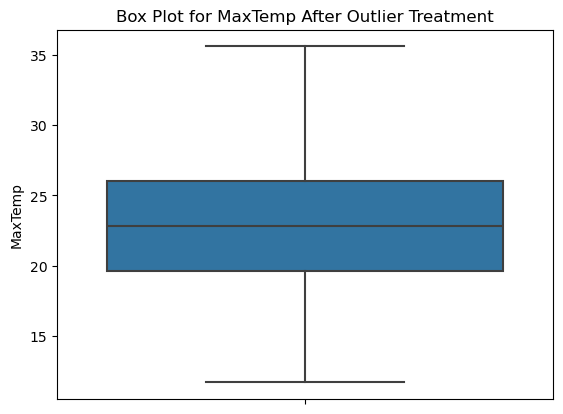

In [260]:
# define function for outlier treatment using box-plot concept
def treat_outliers(data, column):

    # Calculate Q1 (25th-percentile) and Q3 (75th-percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3-Q1

    # Define the bounds for identifying outliers with standard threshold=1.5
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    # print lower bound and upper bound
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Cap the outliers
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return data

# Treat outliers in "MaxTemp" column
sydney_rain = treat_outliers(sydney_rain, 'MaxTemp')

# Verify the outlier treatments for "MaxTemp" 
sns.boxplot(y='MaxTemp', data=sydney_rain)  
plt.title('Box Plot for MaxTemp After Outlier Treatment')
plt.show()

Lower Bound: -2.0999999999999996, Upper Bound: 3.4999999999999996


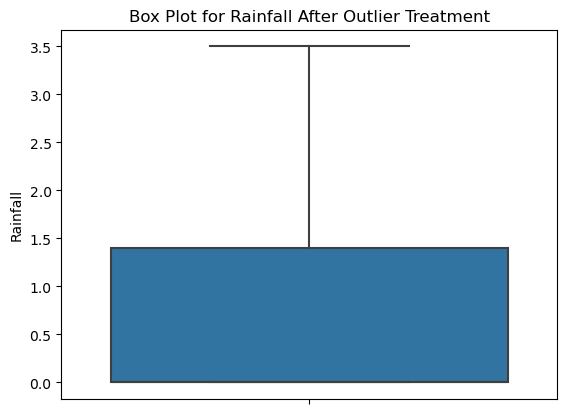

In [261]:
# Treat outliers in "Rainfall" column
sydney_rain = treat_outliers(sydney_rain, 'Rainfall')

# Verify the outlier treatments for "Rainfall"
sns.boxplot(y='Rainfall', data=sydney_rain)
plt.title('Box Plot for Rainfall After Outlier Treatment')
plt.show()

Lower Bound: -2.499999999999999, Upper Bound: 12.7


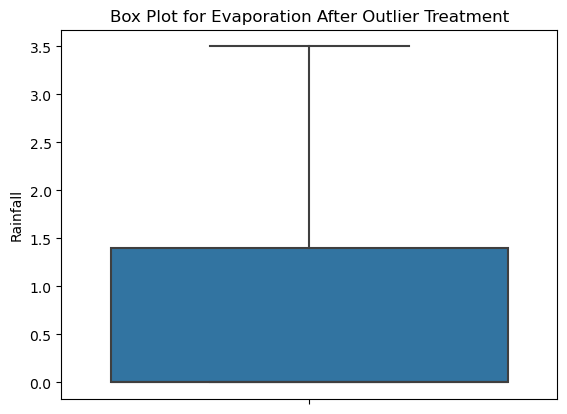

In [262]:
# Treat outliers in "Evaporation" column
sydney_rain = treat_outliers(sydney_rain, 'Evaporation')

# Verify the outlier treatments for "Evaporation"
sns.boxplot(y='Rainfall', data=sydney_rain)
plt.title('Box Plot for Evaporation After Outlier Treatment')
plt.show()

Lower Bound: 25.0, Upper Bound: 113.0


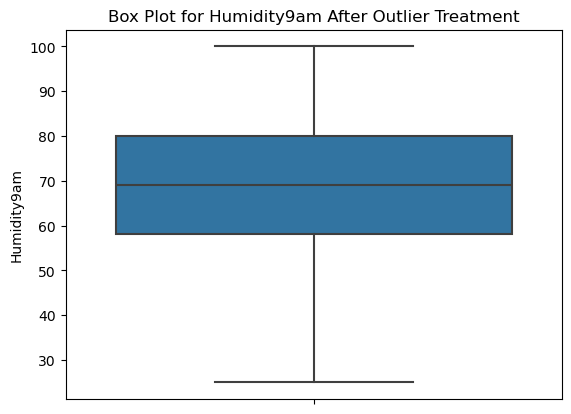

In [263]:
# Treat outliers in "Humidity9am" column
sydney_rain = treat_outliers(sydney_rain, 'Humidity9am')

# Verify the outlier treatments for "Humidity9am"
sns.boxplot(y='Humidity9am', data=sydney_rain)
plt.title('Box Plot for Humidity9am After Outlier Treatment')
plt.show()

Lower Bound: 14.0, Upper Bound: 94.0


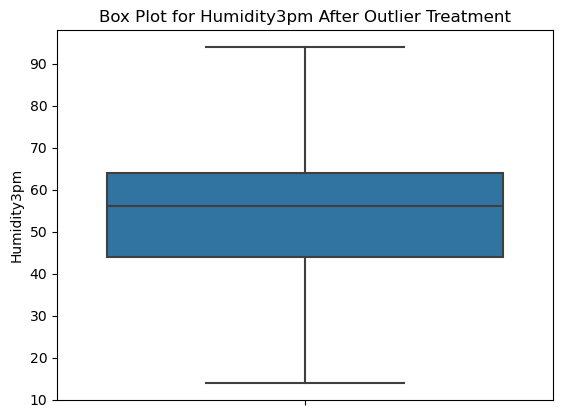

In [264]:
# Treat outliers in "Humidity3pm" column
sydney_rain = treat_outliers(sydney_rain, 'Humidity3pm')

# Verify the outlier treatments for "Humidity3pm"
sns.boxplot(y='Humidity3pm', data=sydney_rain)
plt.title('Box Plot for Humidity3pm After Outlier Treatment')
plt.show()

Lower Bound: 999.8499999999999, Upper Bound: 1037.0500000000002


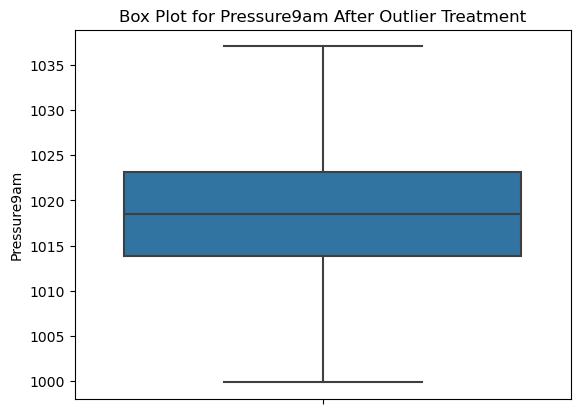

In [265]:
# Treat outliers in "Pressure9am" column
sydney_rain = treat_outliers(sydney_rain, 'Pressure9am')

# Verify the outlier treatments for "Pressure9am"
sns.boxplot(y='Pressure9am', data=sydney_rain)
plt.title('Box Plot for Pressure9am After Outlier Treatment')
plt.show()

Lower Bound: 997.05, Upper Bound: 1035.05


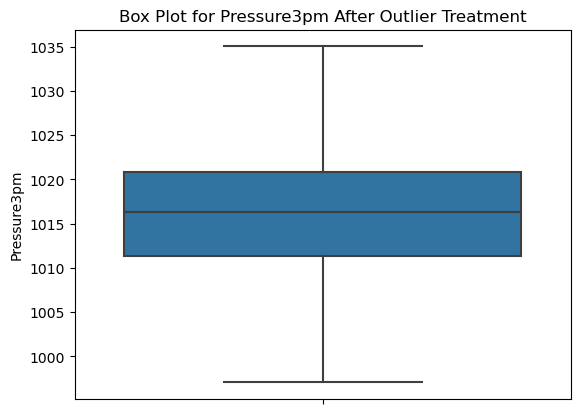

In [266]:
# Treat outliers in "Pressure3pm" column
sydney_rain = treat_outliers(sydney_rain, 'Pressure3pm')

# Verify the outlier treatments for "Pressure3pm"
sns.boxplot(y='Pressure3pm', data=sydney_rain)
plt.title('Box Plot for Pressure3pm After Outlier Treatment')
plt.show()

Lower Bound: 1.9500000000000028, Upper Bound: 33.55


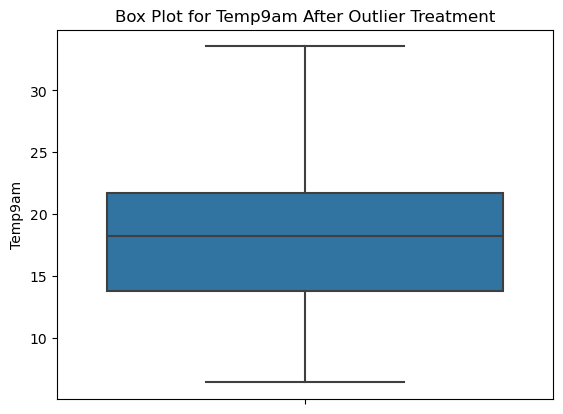

In [267]:
# Treat outliers in "Temp9am" column
sydney_rain = treat_outliers(sydney_rain, 'Temp9am')

# Verify the outlier treatments for "Temp9am"
sns.boxplot(y='Temp9am', data=sydney_rain)
plt.title('Box Plot for Temp9am After Outlier Treatment')
plt.show()

Lower Bound: 9.249999999999996, Upper Bound: 33.650000000000006


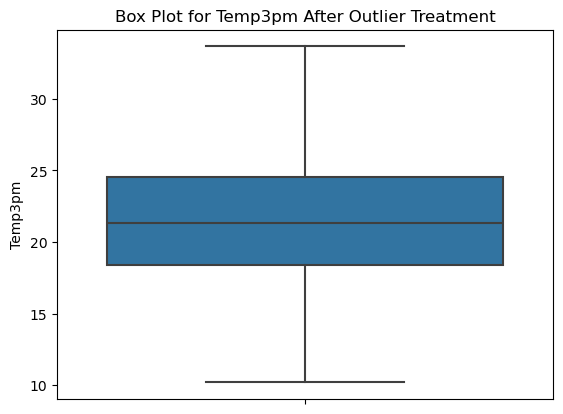

In [268]:
# Treat outliers in "Temp3pm" column
sydney_rain = treat_outliers(sydney_rain, 'Temp3pm')

# Verify the outlier treatments for "Temp3pm"
sns.boxplot(y='Temp3pm', data=sydney_rain)
plt.title('Box Plot for Temp3pm After Outlier Treatment')
plt.show()

##### 2.3.4 Converting Date column data type from "Datetime64" to float

In [269]:
import pandas as pd

# Assuming 'Date' is your datetime column
sydney_rain['Date'] = sydney_rain['Date'].astype('int64') / 10**9  # Convert nanoseconds to seconds

# Printing the 'Date' column
print(sydney_rain['Date'])

0       1.201824e+09
1       1.201910e+09
2       1.201997e+09
3       1.202083e+09
4       1.202170e+09
            ...     
3332    1.498003e+09
3333    1.498090e+09
3334    1.498176e+09
3335    1.498262e+09
3336    1.498349e+09
Name: Date, Length: 3337, dtype: float64


##### 2.3.4 Creating dummies values for categorical variables

In [270]:
# converts the categorical variables in the DataFrame "sydney_rain" into dummy variables and convert it into float data type
sydney_rain = pd.get_dummies(sydney_rain, columns=["Location", "RainToday", "RainTomorrow"], drop_first=True).astype(float)

In [271]:
# To get the information about the "sydney_rain" dataframe, including data types, non-null counts, 
# and memory usage after creating dummies value
sydney_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   float64
 1   MinTemp           3337 non-null   float64
 2   MaxTemp           3337 non-null   float64
 3   Rainfall          3337 non-null   float64
 4   Evaporation       3337 non-null   float64
 5   Sunshine          3337 non-null   float64
 6   Humidity9am       3337 non-null   float64
 7   Humidity3pm       3337 non-null   float64
 8   Pressure9am       3337 non-null   float64
 9   Pressure3pm       3337 non-null   float64
 10  Cloud9am          3337 non-null   float64
 11  Cloud3pm          3337 non-null   float64
 12  Temp9am           3337 non-null   float64
 13  Temp3pm           3337 non-null   float64
 14  RainToday_Yes     3337 non-null   float64
 15  RainTomorrow_Yes  3337 non-null   float64
dtypes: float64(16)
memory usage: 417.3 KB


In [272]:
# To display the first few rows of  "sydney_rain" dataframe to check for the created dummies variables
sydney_rain.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,1.201824e+09,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
1,1.201910e+09,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
2,1.201997e+09,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
3,1.202083e+09,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
4,1.202170e+09,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0


##### 2.3.5  Independent and dependent (RainTomorrow) data spliting

In [273]:
# Creating and printing "X" dataframe as independent data
X = sydney_rain.loc[:,sydney_rain.columns!="RainTomorrow_Yes"]
print(X) # print "X"

              Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     1.201824e+09     19.5     22.4       3.5     6.200000       0.0   
1     1.201910e+09     19.5     25.6       3.5     3.400000       2.7   
2     1.201997e+09     21.6     24.5       3.5     2.400000       0.1   
3     1.202083e+09     20.2     22.8       3.5     2.200000       0.0   
4     1.202170e+09     19.7     25.7       3.5     5.187432       0.0   
...            ...      ...      ...       ...          ...       ...   
3332  1.498003e+09      8.6     19.6       0.0     2.000000       7.8   
3333  1.498090e+09      9.3     19.2       0.0     2.000000       9.2   
3334  1.498176e+09      9.4     17.7       0.0     2.400000       2.7   
3335  1.498262e+09     10.1     19.3       0.0     1.400000       9.3   
3336  1.498349e+09      7.6     19.3       0.0     3.400000       9.4   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            92.0         84.0       1017.6

In [274]:
# Creating and printing "Y" dataframe as dependent data
Y = sydney_rain["RainTomorrow_Yes"]
print(Y) # print "Y"

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3332    0.0
3333    0.0
3334    0.0
3335    0.0
3336    0.0
Name: RainTomorrow_Yes, Length: 3337, dtype: float64


##### 2.3.3 Train-test data spliting from "X" and "Y" splitted dataframes

In [275]:
# Import the "train_test_split" library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with (80-20%) ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the test, train of "X" and "Y" sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2669, 15) (668, 15) (2669,) (668,)


### 2.4 and 2.5 steps of second question-2, I will perfoem with question-3 together
## 3. What were the available ML model options you had to perform this task?
- 3.1 Logistic Regression 

- 3.2 Linear Discriminant Analysis

- 3.3 K-Nearest Neighbors

- 3.4 Gradient search for K-Nearest Neighbors

#### Advance Ensemble techniques like, Bagging, Random forest Classifier, Gradient search, Ada boost, and XG Boost can handle both numerical and categorical data

- 3.5 Bagging

- 3.6 Random Forest 

- 3.7 Gradient search for Random Forest

- 3.8 Gradient Boosting

- 3.9 Ada boost

- 3.10 XG Boost

- 3.11 Gradient search for XG Boost

- 3.12 Classification Decision Tree

### 3.1 Logistic Regression
##### 3.1.1 Performing logistic regression by using sklearn model on "y_train" and "x_train" varaibles

In [276]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler().fit(x_train)

x_train_scaler = scaler.transform(x_train) # Transform the training data using the fitted scaler to standardize it
x_test_scaler = scaler.transform(x_test)   # Transform the test data using the same fitted scaler to standardize it

In [277]:
# Import the LogisticRegression module from the sklearn.linear library
from sklearn.linear_model import LogisticRegression

Logistic_Reg = LogisticRegression() # Define Logistic Regression function

# Fit Logistic Regression on "x_train_scaler" and "y_train"
Logistic_Reg.fit(x_train_scaler, y_train)

LogisticRegression()

In [278]:
# Predict the target variable for the train and test dataset using the trained logistic regression model
LR_y_train_pred = Logistic_Reg.predict(x_train_scaler)
LR_y_test_pred = Logistic_Reg.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m LR_y_train_pred \033[0m"), "\n", LR_y_train_pred, "\n")
print(("\033[1m LR_y_test_pred \033[0m"), "\n", LR_y_test_pred, "\n")

 LR_y_train_pred  
 [0. 0. 0. ... 1. 0. 0.] 

 LR_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0

##### 3.1.2 Performance evaluation for Logistic regression

In [279]:
# Importung mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, from sklearn.metrics model
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score 

##### 3.1.2.1 Calculation of MSE for train and test dataset

In [280]:
# Calculate mean squared error for training dataset of logistic regression
LR_train_mse = mean_squared_error(y_train, LR_y_train_pred)

# Print "MSE" of train dataset for Logistic regression
print(LR_train_mse)  

0.16335706257025104


In [281]:
# Calculate mean squared error for testing dataset of logistic regression
LR_test_mse = mean_squared_error(y_test, LR_y_test_pred)

# Print "MSE" of test dataset for Logistic regression
print(LR_test_mse)  

0.17065868263473055


##### 3.1.2.2 Calculation of MAE for train and test dataset

In [282]:
# Calculate mean absolute error for training dataset of logistic regression
LR_train_mae = mean_absolute_error(y_train, LR_y_train_pred)

# Print "MAE" of train dataset for Logistic regression
print(LR_train_mae) 

0.16335706257025104


In [283]:
# Calculate mean absolute error for testing dataset of logistic regression
LR_test_mae = mean_absolute_error(y_test, LR_y_test_pred)

# Print "MAE" of test dataset for Logistic regression
print(LR_test_mae) 

0.17065868263473055


##### 3.1.2.3 Calculation of confusion matrix for train and test dataset

In [284]:
# Confusion matrix calculation for train dataset of logistic regression
LR_train_conf_mat = confusion_matrix(y_train, LR_y_train_pred)

# Print confusion matrix of train dataset for Logistic regression
print(LR_train_conf_mat) 

[[1823  139]
 [ 297  410]]


In [285]:
# Confusion matrix calculation for test dataset of logistic regression
LR_test_conf_mat = confusion_matrix(y_test, LR_y_test_pred)

# Print confusion matrix of test dataset for Logistic regression
print(LR_test_conf_mat) 

[[475  35]
 [ 79  79]]


##### 3.1.2.4 Calculation of accuracy score for train and test dataset

In [286]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (LR_y_train_pred)
LR_train_acc_score = accuracy_score(y_train, LR_y_train_pred)

## Print accuracy_score of train dataset for logistic regression
print(LR_train_acc_score)

0.8366429374297489


In [287]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (LR_y_test_pred)
LR_test_acc_score = accuracy_score(y_test, LR_y_test_pred)

## Print accuracy_score of test dataset for logistic regression
print(LR_test_acc_score)

0.8293413173652695


##### 3.1.2.5 Checking for overfitting and underfitting

In [288]:
# Check for overfitting
if LR_train_acc_score > LR_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Logistic Regression' trained model is overfitting.")
elif LR_train_acc_score < LR_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Logistic Regression' trained model is underfitting.")
else:
    print("The 'Logistic Regression' trained model is Well-fitted.")

The 'Logistic Regression' trained model is Well-fitted.


### 3.2 Linear Discriminant Analysis (LDA)
##### 3.2.1 Performing Linear Discriminant Analysis by using sklearn model on "y_train" and "x_train" varaibles 

In [289]:
# Import the Linear Discriminant Analysis Ridge regression model from the sklearn.linear_model module
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis model
LDA_clf = LinearDiscriminantAnalysis()

# Fit the Linear Discriminant Analysis model to the (x_train_scaler) and (y_train) values
LDA_clf.fit(x_train_scaler, y_train)

LinearDiscriminantAnalysis()

In [290]:
# Predict the target variable for the train and test dataset for Linear Discriminant Analysis model
LDA_y_train_pred = LDA_clf.predict(x_train_scaler)
LDA_y_test_pred = LDA_clf.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m LDA_y_train_pred \033[0m"), "\n", LDA_y_train_pred, "\n")
print(("\033[1m LDA_y_test_pred \033[0m"), "\n", LDA_y_test_pred, "\n")

 LDA_y_train_pred  
 [0. 0. 0. ... 1. 0. 0.] 

 LDA_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.

##### 3.2.2 Performance evaluation for Linear Discriminant Analysis
##### 3.2.2.1 Calculation of MSE for train and test dataset 

In [291]:
# Calculate mean squared error for training dataset of Linear Discriminant Analysis
LDA_train_mse = mean_squared_error(y_train, LDA_y_train_pred)

# Print "MSE" of train dataset for Linear Discriminant Analysis
print(LDA_train_mse) 

0.16897714499812663


In [292]:
# Calculate mean squared error for testing dataset of Linear Discriminant Analysis
LDA_test_mse = mean_squared_error(y_test, LDA_y_test_pred)

# Print "MSE" of test dataset for Linear Discriminant Analysis
print(LDA_test_mse) 

0.1631736526946108


##### 3.2.2.2 Calculation of MAE for train and test dataset

In [293]:
# Calculate mean absolute error for training dataset of Linear Discriminant Analysis
LDA_train_mae = mean_absolute_error(y_train, LDA_y_train_pred)

# Print "MAE" of train dataset for Linear Discriminant Analysis
print(LDA_train_mae)

0.16897714499812663


In [294]:
# Calculate mean absolute error for testing dataset of Linear Discriminant Analysis
LDA_test_mae = mean_absolute_error(y_test, LDA_y_test_pred)

# Print "MAE" of test dataset for Linear Discriminant Analysis
print(LDA_test_mae)

0.1631736526946108


##### 3.1.2.3 Calculation of confusion matrix for train and test dataset

In [295]:
# Confusion matrix calculation for train dataset of Linear Discriminant Analysis
LDA_train_conf_mat = confusion_matrix(y_train, LDA_y_train_pred)

# Print confusion matrix of train dataset for Linear Discriminant Analysis
print(LDA_train_conf_mat)

[[1798  164]
 [ 287  420]]


In [296]:
# Confusion matrix calculation for test dataset of Linear Discriminant Analysis
LDA_test_conf_mat = confusion_matrix(y_test, LDA_y_test_pred)

# Print confusion matrix of test dataset for Linear Discriminant Analysis
print(LDA_test_conf_mat)

[[470  40]
 [ 69  89]]


##### 3.2.2.4 Calculation of accuracy score for train and test dataset

In [297]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (LDA_y_train_pred)
LDA_train_acc_score = accuracy_score(y_train, LDA_y_train_pred)

## Print accuracy_score of train dataset for Linear Discriminant Analysis
print(LDA_train_acc_score)

0.8310228550018733


In [298]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (LDA_y_test_pred)
LDA_test_acc_score = accuracy_score(y_test, LDA_y_test_pred)

## Print accuracy_score of test dataset for Linear Discriminant Analysis
print(LDA_test_acc_score)

0.8368263473053892


##### 3.2.2.5 Checking for overfitting and underfitting at alpha=0.5

In [299]:
# Check for overfitting
if LDA_train_acc_score > LDA_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Linear Discriminant Analysis' trained model is overfitting.")
elif LDA_train_acc_score < LDA_test_acc_score - 0.15: # Example threshold for overfitting
    print("The 'Linear Discriminant Analysis' trained model is underfitting.")
else:
    print("The 'Linear Discriminant Analysis' trained model is Well-fitted.")

The 'Linear Discriminant Analysis' trained model is Well-fitted.


### 3.3 K-Nearest Neighbors (at n_neighbors=10)
##### 3.3.1 Performing K-Nearest Neighbors by using sklearn model on "y_train" and "x_train" varaibles 

In [300]:
# Import the KNeighborsClassifier model from the sklearn.linear_model module
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier model object with regularization at n_neighbors=10
KNN_clf = KNeighborsClassifier(n_neighbors=10)

# Fit the KNeighborsClassifier model to the standardized (x_train_scaler) and (y_train) values
KNN_clf.fit(x_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=10)

In [301]:
# Predict the target variable for the train and test dataset using the trained KNeighborsClassifier
KNN_y_train_pred = KNN_clf.predict(x_train_scaler)
KNN_y_test_pred = KNN_clf.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m KNN_y_train_pred \033[0m"), "\n", KNN_y_train_pred, "\n")
print(("\033[1m KNN_y_test_pred \033[0m"), "\n", KNN_y_test_pred, "\n")

 KNN_y_train_pred  
 [0. 0. 0. ... 1. 0. 0.] 

 KNN_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

##### 3.3.2 Performance evaluation for K-Nearest Neighbors
##### 3.3.2.1 Calculation of MSE for train and test dataset

In [302]:
# Calculate mean squared error for training dataset of K-Nearest Neighbors
KNN_train_mse = mean_squared_error(y_train, KNN_y_train_pred)

# Print "MSE" of train dataset for K-Nearest Neighbors
print(KNN_train_mse) 

0.1539902585237917


In [303]:
# Calculate mean squared error for testing dataset of K-Nearest Neighbors
KNN_test_mse = mean_squared_error(y_train, KNN_y_train_pred)

# Print "MSE" of test dataset for K-Nearest Neighbors
print(KNN_test_mse) 

0.1539902585237917


##### 3.3.2.2 Calculation of MAE for train and test dataset 

In [304]:
# Calculate mean absolute error for training dataset of K-Nearest Neighbors
KNN_train_mae = mean_absolute_error(y_train, KNN_y_train_pred)

# Print "MAE" of train dataset for K-Nearest Neighbors
print(KNN_train_mae)

0.1539902585237917


In [305]:
# Calculate mean absolute error for testing dataset of K-Nearest Neighbors
KNN_test_mae = mean_absolute_error(y_test, KNN_y_test_pred)

# Print "MAE" of test dataset for K-Nearest Neighbors
print(KNN_test_mae)

0.16467065868263472


##### 3.3.2.3 Calculation of confusion matrix for train and test dataset

In [306]:
# Confusion matrix calculation for train dataset of K-Nearest Neighbors
KNN_train_conf_mat = confusion_matrix(y_train, KNN_y_train_pred)

# Print confusion matrix of train dataset for K-Nearest Neighbors
print(KNN_train_conf_mat)

[[1891   71]
 [ 340  367]]


In [307]:
# Confusion matrix calculation for test dataset of K-Nearest Neighbors
KNN_test_conf_mat = confusion_matrix(y_test, KNN_y_test_pred)

# Print confusion matrix of test dataset for K-Nearest Neighbors
print(KNN_test_conf_mat)

[[486  24]
 [ 86  72]]


##### 3.3.2.4 Calculation of accuracy score for train and test dataset

In [308]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (KNN_y_train_pred)
KNN_train_acc_score = accuracy_score(y_train, KNN_y_train_pred)

## Print accuracy_score of train dataset for K-Nearest Neighbors
print(KNN_train_acc_score)

0.8460097414762083


In [309]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (KNN_y_test_pred)
KNN_test_acc_score = accuracy_score(y_test, KNN_y_test_pred)

## Print accuracy_score of test dataset for K-Nearest Neighbors
print(KNN_test_acc_score)

0.8353293413173652


##### 3.3.2.5 Checking for overfitting and underfitting 

In [310]:
# Check for overfitting
if KNN_train_acc_score > KNN_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'K-Nearest Neighbors' trained model is overfitting.")
elif KNN_train_acc_score < KNN_test_acc_score - 0.15: # Example threshold for overfitting
    print("The 'K-Nearest Neighbors' trained model is underfitting.")
else:
    print("The 'K-Nearest Neighbors' trained model is Well-fitted.")

The 'K-Nearest Neighbors' trained model is Well-fitted.


### 3.4 Gradient search for K-Nearest Neighbors
##### 3.4.1 Performing Gradient search for K-Nearest Neighbors by using sklearn model on "y_train" and "x_train" varaibles 

In [311]:
# Import GridSearchCV libraries from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
params = {'n_neighbors': [4, 7, 13, 14, 25, 6, 12, 8, 9]}

# Initialize the GridSearchCV object with the KNeighborsClassifier and the parameter grid
KNN_grid_search = GridSearchCV(KNeighborsClassifier(), params)

# Fit the GridSearchCV object to the training data
KNN_grid_search.fit(x_train_scaler, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 7, 13, 14, 25, 6, 12, 8, 9]})

In [312]:
# calculate the parameters found in grid search for KNeighborsClassifier
best_param = KNN_grid_search.best_params_

# Print the best parameters
print("Best parameters found: ", best_param)

Best parameters found:  {'n_neighbors': 12}


In [313]:
# Optimised KNeighborsClassifier with best parameter found
optimised_KNN = KNN_grid_search.best_estimator_

# Print the optimised KNN condition
print(optimised_KNN)

KNeighborsClassifier(n_neighbors=12)


In [314]:
# Predict the target variable for the train and test dataset using the trained K-Nearest Neighbors model
KNN_best_y_train_pred = optimised_KNN.predict(x_train_scaler)
KNN_best_y_test_pred = optimised_KNN.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m KNN_best_y_train_pred \033[0m"), "\n", KNN_best_y_train_pred, "\n")
print(("\033[1m KNN_best_y_test_pred \033[0m"), "\n", KNN_best_y_test_pred, "\n")

 KNN_best_y_train_pred  
 [0. 0. 0. ... 1. 0. 0.] 

 KNN_best_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0

##### 3.4.2 Performance evaluation for K-Nearest Neighbors at best
##### 3.4.2.1 Calculation of MSE for train and test dataset 

In [315]:
# Calculate mean squared error for training dataset of K-Nearest Neighbors
KNN_best_train_mse = mean_squared_error(y_train, KNN_best_y_train_pred)

# Print "MSE" of train dataset for K-Nearest Neighbors
print(KNN_best_train_mse) 

0.1554889471712252


In [316]:
# Calculate mean squared error for testing dataset of K-Nearest Neighbors
KNN_best_test_mse = mean_squared_error(y_test, KNN_best_y_test_pred)

# Print "MSE" of test dataset for K-Nearest Neighbors
print(KNN_best_test_mse) 

0.17065868263473055


##### 3.4.2.2 Calculation of MAE for train and test dataset

In [317]:
# Calculate mean absolute error for training dataset of K-Nearest Neighbors
KNN_best_train_mae = mean_absolute_error(y_train, KNN_best_y_train_pred)

# Print "MAE" of train dataset for K-Nearest Neighbors
print(KNN_best_train_mae) 

0.1554889471712252


In [318]:
# Calculate mean absolute error for testing dataset of K-Nearest Neighbors
KNN_best_test_mae = mean_absolute_error(y_test, KNN_best_y_test_pred)

# Print "MAE" of test dataset for K-Nearest Neighbors
print(KNN_best_test_mae) 

0.17065868263473055


##### 3.4.2.3 Calculation of confusion matrix for train and test dataset

In [319]:
# Confusion matrix calculation for train dataset of K-Nearest Neighbors
KNN_best_train_conf_mat = confusion_matrix(y_train, KNN_best_y_train_pred)

# Print confusion matrix of train dataset for K-Nearest Neighbors
print(KNN_best_train_conf_mat)

[[1882   80]
 [ 335  372]]


In [320]:
# Confusion matrix calculation for test dataset of K-Nearest Neighbors
KNN_best_test_conf_mat = confusion_matrix(y_test, KNN_best_y_test_pred)

# Print confusion matrix of test dataset for K-Nearest Neighbors
print(KNN_best_test_conf_mat)

[[485  25]
 [ 89  69]]


##### 3.4.2.4 Calculation of accuracy score for train and test dataset

In [321]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (KNN_best_y_train_pred)
KNN_best_train_acc_score = accuracy_score(y_train, KNN_best_y_train_pred)

## Print accuracy_score of train dataset for K-Nearest Neighbors
print(KNN_best_train_acc_score)

0.8445110528287748


In [322]:
# accuracy_score calculation for the test dataset's for actual values (y_train) and predicted values (KNN_best_y_train_pred)
KNN_best_test_acc_score = accuracy_score(y_test, KNN_best_y_test_pred)

## Print accuracy_score of test dataset for K-Nearest Neighbors
print(KNN_best_test_acc_score)

0.8293413173652695


##### 3.4.2.5 Checking for overfitting and underfitting

In [323]:
# Check for overfitting
if KNN_best_train_acc_score > KNN_best_test_acc_score + 0.15:    # Example threshold for overfitting
    print("The 'K-Nearest Neighbors at best k' trained model is overfitting.")
elif KNN_best_train_acc_score < KNN_best_test_acc_score - 0.15:  # Example threshold for overfitting
    print("The 'K-Nearest Neighbors at best k' trained model is underfitting.")
else:
    print("The 'K-Nearest Neighbors at best k' trained model is Well-fitted.")

The 'K-Nearest Neighbors at best k' trained model is Well-fitted.


### 3.5 Bagging
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
##### 3.5.1 Performing Bagging by using sklearn model on "y_train" and "x_train" varaibles 

In [324]:
# Import BaggingClassifier model from sklearn.model and tree from sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Creating an instance of BaggingClassifier with the dicision tree
clftree_bag = tree.DecisionTreeClassifier()
Bag_clf = BaggingClassifier(estimator=clftree_bag, n_estimators=1000, bootstrap=True, n_jobs=1, random_state=42)

# Fit the BaggingClassifier with "x_train_scaler" and "y_train"
Bag_clf.fit(x_train_scaler, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=1, random_state=42)

In [325]:
# Predict the target variable for the train and test dataset using the trained Lasso regression model for best fit
Bagging_y_train_pred = Bag_clf.predict(x_train_scaler)
Bagging_y_test_pred = Bag_clf.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m Bagging_y_train_pred \033[0m"), "\n", Bagging_y_train_pred, "\n")
print(("\033[1m Bagging_y_test_pred \033[0m"), "\n", Bagging_y_test_pred, "\n")

 Bagging_y_train_pred  
 [1. 0. 0. ... 1. 0. 0.] 

 Bagging_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 

##### 3.5.2 Performance evaluation for Bagging classifier
##### 3.5.2.1 Calculation of MSE for train and test dataset

In [326]:
# Calculate mean squared error for training dataset of Bagging classifier
Bagging_train_mse = mean_squared_error(y_train, Bagging_y_train_pred)

# Print "MSE" of train dataset for Bagging classifier
print(Bagging_train_mse) 

0.0


In [327]:
# Calculate mean squared error for training dataset of Bagging classifier
Bagging_test_mse = mean_squared_error(y_test, Bagging_y_test_pred  )

# Print "MSE" of test dataset for Bagging classifier
print(Bagging_test_mse) 

0.17964071856287425


##### 3.5.2.2 Calculation of MAE for train and test dataset at alpha=best fit

In [328]:
# Calculate mean absolute error for training dataset of Bagging classifier
Bagging_train_mae = mean_absolute_error(y_train, Bagging_y_train_pred  )

# Print "MAE" of train dataset for Bagging classifier
print(Bagging_train_mae) 

0.0


In [329]:
# Calculate mean absolute error for training dataset of Bagging classifier
Bagging_test_mae = mean_squared_error(y_test, Bagging_y_test_pred  )

# Print "MAE" of test dataset for Bagging classifier
print(Bagging_test_mae) 

0.17964071856287425


##### 3.5.2.3 Calculation of confusion matrix for train and test dataset

In [330]:
# Confusion matrix calculation for train dataset of Bagging classifier
Bagging_train_conf_mat = confusion_matrix(y_train, Bagging_y_train_pred)

# Print confusion matrix of train dataset for Bagging classifier
print(Bagging_train_conf_mat)

[[1962    0]
 [   0  707]]


In [331]:
# Confusion matrix calculation for test dataset of Bagging classifier
Bagging_test_conf_mat = confusion_matrix(y_test, Bagging_y_test_pred)

# Print confusion matrix of test dataset for Bagging classifier
print(Bagging_test_conf_mat)

[[469  41]
 [ 79  79]]


##### 3.5.2.4 Calculation of accuracy score for train and test dataset

In [332]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (Bagging_y_train_pred)
Bagging_train_acc_score = accuracy_score(y_train, Bagging_y_train_pred)

## Print accuracy_score of train dataset for Bagging classifier
print(Bagging_train_acc_score)

1.0


In [333]:
# accuracy_score calculation for the train dataset's for actual values (y_test) and predicted values (Bagging_y_test_pred)
Bagging_test_acc_score = accuracy_score(y_test, Bagging_y_test_pred)

## Print accuracy_score of test dataset for Bagging classifier
print(Bagging_test_acc_score)

0.8203592814371258


##### 3.5.2.4 Checking for overfitting and underfitting 

In [334]:
# Check for overfitting
if Bagging_train_acc_score > Bagging_test_acc_score + 0.15:    # Example threshold for overfitting
    print("The 'Bagging classifier' trained model is overfitting.")
elif Bagging_train_acc_score < Bagging_test_acc_score - 0.15:  # Example threshold for overfitting
    print("The 'Bagging classifier' trained model is underfitting.")
else:
    print("The 'Bagging classifier' trained model is Well-fitted.")

The 'Bagging classifier' trained model is overfitting.


### 3.6 Random Forest Classifier

#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
##### 3.6.1 Performing Random Forest classifier by using sklearn model on "y_train" and "x_train" varaibles 

In [335]:
# Importing the RandomForestClassifier model from the sklearn.linear_model module
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=42)

# Now fit your RandomForestClassifier
RF_clf.fit(x_train_scaler, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=42)

In [336]:
# Predict the target variable for the train and test dataset using the trained random forest classifier model
RF_y_train_pred = RF_clf.predict(x_train_scaler)
RF_y_test_pred = RF_clf.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m RF_y_train_pred \033[0m"), "\n", RF_y_train_pred, "\n")
print(("\033[1m RF_y_test_pred \033[0m"), "\n", RF_y_test_pred, "\n")

 RF_y_train_pred  
 [1. 0. 0. ... 1. 0. 0.] 

 RF_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0

##### 3.6.2 Performance evaluation for Random Forest classifier
##### 3.6.2.1 Calculation of MSE for train and test dataset 

In [337]:
# Calculate mean squared error for training dataset of random forest classifier
RF_train_mse = mean_squared_error(y_train, RF_y_train_pred)

# Print "MSE" of train dataset for random forest classifier
print(RF_train_mse) 

0.0


In [338]:
# Calculate mean squared error for testing dataset of random forest classifier
RF_test_mse = mean_squared_error(y_test, RF_y_test_pred)

# Print "MSE" of test dataset for random forest classifier
print(RF_test_mse) 

0.16167664670658682


##### 3.6.2.2 Calculation of MAE for train and test dataset 

In [339]:
# Calculate mean absolute error for training dataset of random forest classifier
RF_train_mae = mean_absolute_error(y_train, RF_y_train_pred)

# Print "MAE" of train dataset for random forest classifier
print(RF_train_mae)

0.0


In [340]:
# Calculate mean absolute error for testing dataset of random forest classifier
RF_test_mae = mean_absolute_error(y_test, RF_y_test_pred)

# Print "MAE" of test dataset for random forest classifier
print(RF_test_mae)

0.16167664670658682


##### 3.6.2.3 Calculation of confusion matrix for train and test dataset 

In [341]:
# Confusion matrix calculation for train dataset of random forest classifier
RF_train_conf_mat = confusion_matrix(y_train, RF_y_train_pred)

# Print confusion matrix of train dataset for random forest classifier
print(RF_train_conf_mat)

[[1962    0]
 [   0  707]]


In [342]:
# Confusion matrix calculation for test dataset of random forest classifier
RF_test_conf_mat = confusion_matrix(y_test, RF_y_test_pred)

# Print confusion matrix of test dataset for random forest classifier
print(RF_test_conf_mat)

[[481  29]
 [ 79  79]]


##### 3.6.2.4 Calculation of accuracy score for train and test dataset 

In [343]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (RF_y_train_pred)
RF_train_acc_score = accuracy_score(y_train, RF_y_train_pred)

## Print accuracy_score of train dataset for random forest classifier
print(RF_train_acc_score)

1.0


In [344]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (RF_y_test_pred)
RF_test_acc_score = accuracy_score(y_test, RF_y_test_pred)

## Print accuracy_score of test dataset for random forest classifier
print(RF_test_acc_score)

0.8383233532934131


##### 3.6.2.5 Checking for overfitting and underfitting 

In [345]:
# Check for overfitting
if RF_train_acc_score > RF_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Random Forest Classifier' trained model is overfitting.")
elif RF_train_acc_score < RF_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Random Forest Classifier' trained model is underfitting.")
else:
    print("The 'Random Forest Classifier' trained model is Well-fitted.")  

The 'Random Forest Classifier' trained model is overfitting.


### 3.7 Grid Search technique for Random forest classifier
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [346]:
# Import GridSearchCV libraries from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Initialize a RandomForestClassifier with 250 estimators and a fixed random state for reproducibility
GS_RF_clf = RandomForestClassifier(n_estimators=500, random_state=42)

# Define a grid of hyperparameters to search over
params_grid = {"max_features": [4, 5, 6, 7, 8, 9, 10],  # The number of features to consider when looking for the best split
               "min_samples_split": [2, 3, 10]}         # The minimum number of samples required to split an internal node

##### Grid search for Random forest classifier is taking little time for execution

In [347]:
# Initialize GridSearchCV with the RandomForestRegressor, parameter grid, and other necessary settings
RF_grid_search = GridSearchCV(GS_RF_clf, params_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Assuming X_train and y_train are your training features and labels, fit the GridSearchCV
RF_grid_search.fit(x_train_scaler, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [348]:
# calculate the parameters found in grid search for random forest classifier
best_param = RF_grid_search.best_params_

# Print the best parameters
print("Best parameters found: ", best_param)

Best parameters found:  {'max_features': 6, 'min_samples_split': 10}


In [349]:
# Predict the target variable for the train and test dataset using the grid search for random forest classifier model
GS_RF_y_train_pred = RF_grid_search.predict(x_train_scaler)
GS_RF_y_test_pred = RF_grid_search.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m GS_RF_y_train_pred \033[0m"), "\n", GS_RF_y_train_pred, "\n")
print(("\033[1m GS_RF_y_test_pred \033[0m"), "\n", GS_RF_y_test_pred, "\n")

 GS_RF_y_train_pred  
 [1. 0. 0. ... 1. 0. 0.] 

 GS_RF_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0

##### 3.7.2 Performance evaluation for grid search technique for Random Forest classifier
##### 3.7.2.1 Calculation of MSE for train and test dataset 

In [350]:
# Calculate mean squared error for training dataset of grid search for random forest classifier
GS_RF_train_mse = mean_squared_error(y_train, GS_RF_y_train_pred)

# Print "MSE" of train dataset of grid search for random forest classifier
print(GS_RF_train_mse) 

0.04233795428999625


In [351]:
# Calculate mean squared error for testing dataset of grid search for random forest classifier
GS_RF_test_mse = mean_squared_error(y_test, GS_RF_y_test_pred)

# Print "MSE" of test dataset of grid search for random forest classifier
print(GS_RF_test_mse) 

0.1721556886227545


##### 3.7.2.2 Calculation of MAE for train and test dataset 

In [352]:
# Calculate mean absolute error for training dataset of grid search for random forest classifier
GS_RF_train_mae = mean_absolute_error(y_train, GS_RF_y_train_pred)

# Print "MAE" of train dataset of grid search for random forest classifier
print(GS_RF_train_mae)

0.04233795428999625


In [353]:
# Calculate mean absolute error for testing dataset of grid search for random forest classifier
GS_RF_test_mae = mean_absolute_error(y_test, GS_RF_y_test_pred)

# Print "MAE" of test dataset of grid search for random forest classifier
print(GS_RF_test_mae)

0.1721556886227545


##### 3.7.2.3 Calculation of confusion matrix for train and test dataset 

In [354]:
# Confusion matrix calculation for train dataset by grid search of random forest classifier
GS_RF_train_conf_mat = confusion_matrix(y_train, GS_RF_y_train_pred)

# Print confusion matrix of train dataset by grid search of random forest classifier
print(GS_RF_train_conf_mat)

[[1949   13]
 [ 100  607]]


In [355]:
# Confusion matrix calculation for test dataset by grid search of random forest classifier
GS_RF_test_conf_mat = confusion_matrix(y_test, GS_RF_y_test_pred)

# Print confusion matrix of test dataset by grid search of random forest classifier
print(GS_RF_test_conf_mat)

[[474  36]
 [ 79  79]]


##### 3.7.2.4 Calculation of accuracy score for train and test dataset 

In [356]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (GS_RF_y_train_pred)
GS_RF_train_acc_score = accuracy_score(y_train, GS_RF_y_train_pred)

## Print accuracy_score of train dataset by grid search of random forest classifier
print(GS_RF_train_acc_score)

0.9576620457100038


In [357]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (GS_RF_y_test_pred)
GS_RF_test_acc_score = accuracy_score(y_test, GS_RF_y_test_pred)

## Print accuracy_score of test dataset by grid search of random forest classifier
print(GS_RF_test_acc_score)

0.8278443113772455


##### 3.4.2.4 Checking for overfitting and underfitting 

In [358]:
# Check for overfitting
if GS_RF_train_acc_score > GS_RF_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Grid search of Random Forest Regression' trained model is overfitting.")
elif GS_RF_train_acc_score < GS_RF_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Grid search of Random Forest Regression' trained model is underfitting.")
else:
    print("The 'Grid search of Random Forest Regression' trained model is Well-fitted.")    

The 'Grid search of Random Forest Regression' trained model is Well-fitted.


### 3.8 Gradient Boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
##### 3.8.1 Performing Gradient boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [359]:
# import GradientBoostingClassifier from sklearn.ensemble model
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of GradientBoostingClassifier
GB_clf = GradientBoostingClassifier()

# Fit the GradientBoostingClassifier model to the training data
GB_clf.fit(x_train_scaler, y_train)

GradientBoostingClassifier()

In [360]:
# Predict the target variable for the train and test dataset using the trained Gradient boosting model
GB_y_train_pred = GB_clf.predict(x_train_scaler)
GB_y_test_pred = GB_clf.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m GB_y_train_pred \033[0m"), "\n", GB_y_train_pred, "\n")
print(("\033[1m GB_y_test_pred \033[0m"), "\n", GB_y_test_pred, "\n")

 GB_y_train_pred  
 [1. 0. 0. ... 1. 0. 0.] 

 GB_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0

##### 3.8.2 Performance evaluation for Gradient boosting
##### 3.8.2.1 Calculation of MSE for train and test dataset 

In [361]:
# Calculate mean squared error for training dataset of gradient boosting
GB_train_mse = mean_squared_error(y_train, GB_y_train_pred)

# Print "MSE" of train dataset for gradient boosting
print(GB_train_mse) 

0.11764705882352941


In [362]:
# Calculate mean squared error for testing dataset of gradient boosting
GB_test_mse = mean_squared_error(y_test, GB_y_test_pred)

# Print "MSE" of test dataset for gradient boosting
print(GB_test_mse) 

0.1601796407185629


##### 3.8.2.2 Calculation of MAE for train and test dataset 

In [363]:
# Calculate mean absolute error for training dataset of gradient boosting
GB_train_mae = mean_absolute_error(y_train, GB_y_train_pred)

# Print "MAE" of train dataset for gradient boosting
print(GB_train_mae)

0.11764705882352941


In [364]:
# Calculate mean absolute error for testing dataset of gradient boosting
GB_test_mae = mean_absolute_error(y_test, GB_y_test_pred)

# Print "MAE" of test dataset for gradient boosting
print(GB_test_mae)

0.1601796407185629


##### 3.8.2.3 Calculation of confusion matrix for train and test dataset 

In [365]:
# Confusion matrix calculation for train dataset by grid search of gradient boosting
GB_train_conf_mat = confusion_matrix(y_train, GB_y_train_pred)

# Print confusion matrix of train dataset by grid search of Gradient boosting
print(GB_train_conf_mat)

[[1900   62]
 [ 252  455]]


In [366]:
# Confusion matrix calculation for test dataset by grid search of gradient boosting
GB_test_conf_mat = confusion_matrix(y_test, GB_y_test_pred)

# Print confusion matrix of test dataset by grid search of Gradient boosting
print(GB_test_conf_mat)

[[482  28]
 [ 79  79]]


##### 3.8.2.3 Calculation of accuracy score for train and test dataset 

In [367]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (GB_y_train_pred)
GB_train_acc_score = accuracy_score(y_train, GB_y_train_pred)

## Print accuracy_score of train dataset by grid search of gradient boosting
print(GB_train_acc_score)

0.8823529411764706


In [368]:
# accuracy_score calculation for the train dataset's for actual values (y_test) and predicted values (GB_y_test_pred)
GB_test_acc_score = accuracy_score(y_test, GB_y_test_pred)

## Print accuracy_score of test dataset by grid search of gradient boosting
print(GB_test_acc_score)

0.8398203592814372


##### 3.8.2.4 Checking for overfitting and underfitting 

In [369]:
# Check for overfitting
if GB_train_acc_score > GB_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Gradient boosting' trained model is overfitting.")
elif GB_train_acc_score < GB_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Gradient boosting' trained model is underfitting.")
else:
    print("The 'Gradient boosting' trained model is Well-fitted.")

The 'Gradient boosting' trained model is Well-fitted.


### 3.9 Ada boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
##### 3.9.1 Performing  Ada boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [370]:
# import AdaBoostClassifierfrom sklearn.ensemble model
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of AdaBoostClassifier with specified parameters at learning_rate=0.02 and n_estimators=1000
Ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=1000)

# Fit the AdaBoostClassifier model to the training data
Ada_clf.fit(x_train_scaler, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=1000)

In [371]:
# Predict the target variable for the train and test dataset using the trained Ada boosting model
Ada_y_train_pred = Ada_clf.predict(x_train_scaler)
Ada_y_test_pred = Ada_clf.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m Ada_y_train_pred \033[0m"), "\n", Ada_y_train_pred, "\n")
print(("\033[1m Ada_y_test_pred \033[0m"), "\n", Ada_y_test_pred, "\n")

 Ada_y_train_pred  
 [0. 0. 0. ... 1. 0. 0.] 

 Ada_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.

##### 3.9.2 Performance evaluation for Ada boosting
##### 3.9.2.1 Calculation of MSE for train and test dataset 

In [372]:
# Calculate mean squared error for training dataset of ada boosting
Ada_train_mse = mean_squared_error(y_train, Ada_y_train_pred)

# Print "MSE" of train dataset for ada boosting
print(Ada_train_mse) 

0.15361558636193332


In [373]:
# Calculate mean squared error for testing dataset of ada boosting
Ada_test_mse = mean_squared_error(y_test, Ada_y_test_pred)

# Print "MSE" of test dataset for ada boosting
print(Ada_test_mse) 

0.15718562874251496


##### 3.9.2.2 Calculation of MAE for train and test dataset 

In [374]:
# Calculate mean absolute error for training dataset of ada boosting
Ada_train_mae = mean_absolute_error(y_train, Ada_y_train_pred)

# Print "MAE" of train dataset for ada boosting
print(Ada_train_mae)

0.15361558636193332


In [375]:
# Calculate mean absolute error for testing dataset of ada boosting
Ada_test_mae = mean_absolute_error(y_test, Ada_y_test_pred)

# Print "MAE" of test dataset for ada boosting
print(Ada_test_mae)

0.15718562874251496


##### 3.9.2.3 Calculation of confusion matrix for train and test dataset 

In [376]:
# Confusion matrix calculation for train dataset of ada boosting
Ada_train_conf_mat = confusion_matrix(y_train, Ada_y_train_pred)

# Print confusion matrix of train dataset of ada boosting
print(Ada_train_conf_mat)

[[1878   84]
 [ 326  381]]


In [377]:
# Confusion matrix calculation for test dataset of ada boosting
Ada_test_conf_mat = confusion_matrix(y_test, Ada_y_test_pred)

# Print confusion matrix of test dataset of ada boosting
print(Ada_test_conf_mat)

[[486  24]
 [ 81  77]]


##### 3.9.2.4 Calculation of accuracy score for train and test dataset 

In [378]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (Ada_y_train_pred)
Ada_train_acc_score = accuracy_score(y_train, Ada_y_train_pred)

## Print accuracy_score of train dataset of ada boosting
print(Ada_train_acc_score)

0.8463844136380667


In [379]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (Ada_y_test_pred)
Ada_test_acc_score = accuracy_score(y_test, Ada_y_test_pred)

# Print R-square of test dataset for ada boosting
print(Ada_test_acc_score)

0.842814371257485


##### 3.9.2.5 Checking for overfitting and underfitting 

In [380]:
# Check for overfitting
if Ada_train_acc_score > Ada_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'ADA boosting' trained model is overfitting.")
elif Ada_train_acc_score < Ada_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'ADA boosting' trained model is underfitting.")
else:
    print("The 'ADA boosting' trained model is Well-fitted.")

The 'ADA boosting' trained model is Well-fitted.


### 3.10 XG Boost
#### https://xgboost.readthedocs.io/en/stable/get_started.html
##### 3.10.1 Performing  Ada boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [381]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [382]:
import xgboost as xgb  # import Xgboost

# Create an XGBoost Classifier with specified hyperparameters
Xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=5000, learning_rate=0.3, n_jobs=-1)

# Fit the XGBoost model with x_train_scaler and y_train for int data type
Xgb_clf.fit(x_train_scaler, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [383]:
# Predict the target variable for the train and test dataset using the trained XG boosting model
Xgb_y_train_pred = Xgb_clf.predict(x_train_scaler)
Xgb_y_test_pred = Xgb_clf.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m Xgb_y_train_pred \033[0m"), "\n", Xgb_y_train_pred, "\n")
print(("\033[1m Xgb_y_test_pred \033[0m"), "\n", Xgb_y_test_pred, "\n")

 Xgb_y_train_pred  
 [1 0 0 ... 1 0 0] 

 Xgb_y_test_pred  
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 

##### 3.10.2 Performance evaluation for Xgb boosting
##### 3.10.2.1 Calculation of MSE for train and test dataset 

In [384]:
# Calculate mean squared error for training dataset of xgb boosting
Xgb_train_mse = mean_squared_error(y_train, Xgb_y_train_pred)

# Print "MSE" of train dataset for xgb boosting
print(Xgb_train_mse) 

0.0


In [385]:
# Calculate mean squared error for testing dataset of xgb boosting
Xgb_test_mse = mean_squared_error(y_test, Xgb_y_test_pred)

# Print "MSE" of test dataset for xgb boosting
print(Xgb_test_mse) 

0.16167664670658682


##### 3.10.2.2 Calculation of MAE for train and test dataset 

In [386]:
# Calculate mean absolute error for training dataset of XGb boosting
Xgb_train_mae = mean_absolute_error(y_train, Xgb_y_train_pred)

# Print "MAE" of train dataset for Xgb boosting
print(Xgb_train_mae)

0.0


In [387]:
# Calculate mean absolute error for testing dataset of XGb boosting
Xgb_test_mae = mean_absolute_error(y_test, Xgb_y_test_pred)

# Print "MAE" of test dataset for Xgb boosting
print(Xgb_test_mae)

0.16167664670658682


##### 3.10.2.3 Calculation of confusion matrix for train and test dataset 

In [388]:
# Confusion matrix calculation for train dataset of Xgb boosting
Xgb_train_conf_mat = confusion_matrix(y_train, Xgb_y_train_pred)

# Print confusion matrix of train dataset of Xgb boosting
print(Xgb_train_conf_mat)

[[1962    0]
 [   0  707]]


In [389]:
# Confusion matrix calculation for test dataset of Xgb boosting
Xgb_test_conf_mat = confusion_matrix(y_test, Xgb_y_test_pred)

# Print confusion matrix of test dataset of Xgb boosting
print(Xgb_test_conf_mat)

[[474  36]
 [ 72  86]]


##### 3.10.2.4 Calculation of accuracy score for train and test dataset 

In [390]:
# accuracy score calculation for the train dataset's for actual values (y_train) and predicted values (XGb_y_train_pred)
Xgb_train_acc_score = accuracy_score(y_train, Xgb_y_train_pred)

# Print accuracy score of train dataset for XGb boosting
print(Xgb_train_acc_score)

1.0


In [391]:
# accuracy score calculation for the test dataset's for actual values (y_test) and predicted values (XGb_y_test_pred)
Xgb_test_acc_score = accuracy_score(y_test, Xgb_y_test_pred)

# Print accuracy score of test dataset for XGb boosting
print(Xgb_test_acc_score)

0.8383233532934131


##### 3.10.2.5 Checking for overfitting and underfitting 

In [392]:
# Check for overfitting
if Xgb_train_acc_score > Xgb_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Xgb boosting' trained model is overfitting.")
elif Xgb_train_acc_score < Xgb_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Xgb boosting' trained model is underfitting.")
else:
    print("The 'Xgb boosting' trained model is Well-fitted.")

The 'Xgb boosting' trained model is overfitting.


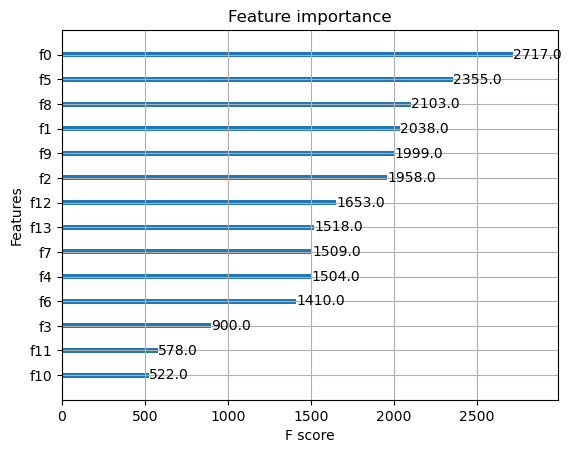

In [393]:
# Import matplot from matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(Xgb_clf)
plt.show()

### 3.11 Grid Search technique for Xgb Boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
##### 3.11.1 Performing  Grid Search technique for Xgb Boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [394]:
# Define a dictionary to hold the hyperparameters and their respective ranges/values for testing
param_test = {
    "max_depth": range(3, 11, 2),      # The range of maximum tree depth to consider (3, 11, 2)
    "gamma": [0.1, 0.2, 0.3],          # The list of gamma values to test (used to control regularization)
    "subsample": [0.8, 0.9],           # The list of subsample ratios to test 
    "colsample_bytree": [0.8, 0.9],    # The list of column sample ratios to test
    "reg_alpha": [1e-2, 0.1, 1]}       # The list of L1 regularization terms on weights to test (to control overfitting)

##### Grid search for Xgb boosting is taking little time for execution

In [395]:
# Perform Grid Search with Cross-Validation using the specified parameter grid fro Xgb boosting
Xgb_grid_search = GridSearchCV(Xgb_clf, param_test, n_jobs=-1, cv=3, scoring="accuracy")

# Fit the Grid Search model to the training data for Xgb boosting
Xgb_grid_search.fit(x_train_scaler, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=5000,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 11, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [396]:
# calculate the parameters found in grid search for Xgb boosting
Xgb_best_param = Xgb_grid_search.best_params_

# Print the best parameters
print("Best parameters found for XGb Boosting: ", Xgb_best_param)

Best parameters found for XGb Boosting:  {'colsample_bytree': 0.8, 'gamma': 0.3, 'max_depth': 9, 'reg_alpha': 1, 'subsample': 0.9}


In [397]:
# Predict the target variable for the train and test dataset using the grid search for Xgb boosting model
GS_Xgb_y_train_pred = Xgb_grid_search.predict(x_train_scaler)
GS_Xgb_y_test_pred = Xgb_grid_search.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m GS_Xgb_y_train_pred \033[0m"), "\n", GS_Xgb_y_train_pred, "\n")
print(("\033[1m GS_Xgb_y_test_pred \033[0m"), "\n", GS_Xgb_y_test_pred, "\n")

 GS_Xgb_y_train_pred  
 [1 0 0 ... 1 0 0] 

 GS_Xgb_y_test_pred  
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 

##### 3.11.2 Performance evaluation for grid search technique for Xgb boosting
##### 3.11.2.1 Calculation of MSE for train and test dataset 

In [398]:
# Calculate mean squared error for training dataset of grid search for Xgb boosting
GS_Xgb_train_mse = mean_squared_error(y_train, GS_Xgb_y_train_pred)

# Print "MSE" of train dataset of grid search for Xgb boosting
print(GS_Xgb_train_mse) 

0.0014986886474334957


In [399]:
# Calculate mean squared error for testing dataset of grid search for Xgb boosting
GS_Xgb_test_mse = mean_squared_error(y_test, GS_Xgb_y_test_pred)

# Print "MSE" of test dataset of grid search for Xgb boosting
print(GS_Xgb_test_mse)

0.16766467065868262


##### 3.11.2.2 Calculation of MAE for train and test dataset 

In [400]:
# Calculate mean absolute error for training dataset of grid search for Xgb boosting
GS_Xgb_train_mae = mean_absolute_error(y_train, GS_Xgb_y_train_pred)

# Print "MAE" of train dataset of grid search for Xgb boosting
print(GS_Xgb_train_mae)

0.0014986886474334957


In [401]:
# Calculate mean absolute error for testing dataset of grid search for Xgb boosting
GS_Xgb_test_mae = mean_absolute_error(y_test, GS_Xgb_y_test_pred)

# Print "MAE" of test dataset of grid search for Xgb boosting
print(GS_Xgb_test_mae)

0.16766467065868262


##### 3.11.2.3 Calculation of confusion matrix for train and test dataset 

In [402]:
# Confusion matrix calculation for train dataset of grid search for Xgb boosting
GS_Xgb_train_conf_mat = confusion_matrix(y_train, GS_Xgb_y_train_pred)

# Print confusion matrix of train dataset of grid search for Xgb boosting
print(GS_Xgb_train_conf_mat)

[[1961    1]
 [   3  704]]


In [403]:
# Confusion matrix calculation for test dataset of grid search for Xgb boosting
GS_Xgb_test_conf_mat = confusion_matrix(y_test, GS_Xgb_y_test_pred)

# Print confusion matrix of test dataset of grid search for Xgb boosting
print(GS_Xgb_test_conf_mat)

[[476  34]
 [ 78  80]]


##### 3.11.2.4 Calculation of accuracy score for train and test dataset 

In [404]:
# accuracy score calculation for the train dataset's for actual values (y_train) and predicted values (GS_Xgb_y_train_pred)
GS_Xgb_train_acc_score = accuracy_score(y_train, GS_Xgb_y_train_pred)

# Print accuracy score of train dataset of grid search for Xgb boosting
print(GS_Xgb_train_acc_score)

0.9985013113525665


In [405]:
# accuracy score calculation for the test dataset's for actual values (y_train) and predicted values (GS_Xgb_y_test_pred)
GS_Xgb_test_acc_score = accuracy_score(y_test, GS_Xgb_y_test_pred)

# Print accuracy score of test dataset of grid search for Xgb boosting
print(GS_Xgb_test_acc_score)

0.8323353293413174


##### 3.11.2.5 Checking for overfitting and underfitting 

In [406]:
# Check for overfitting
if GS_Xgb_train_acc_score > GS_Xgb_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Grid search of Xgb Boosting' trained model is overfitting.")
elif GS_Xgb_train_acc_score < GS_Xgb_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Grid search of Xgb Boosting' trained model is underfitting.")
else:
    print("The 'Grid search of Xgb Boosting' trained model is Well-fitted.")

The 'Grid search of Xgb Boosting' trained model is overfitting.


### 3.12 Classification Decision Tree
##### 3.12.1 Performing Regression Decision Tree technique by using sklearn model on "y_train" and "x_train" varaibles 

In [407]:
# Import tree from sklearn model
from sklearn import tree

# Train tree for the classifier at max_depth=3
clftree = tree.DecisionTreeClassifier(max_depth = 3)

# Fit classifier tree with train datasets
clftree.fit(x_train_scaler, y_train)

DecisionTreeClassifier(max_depth=3)

In [408]:
# Import Image from IPython.display model
from IPython.display import Image  

# Import pydotplus
import pydotplus 

In [409]:
# export graphviz for tree with some defined parameters
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names=x_train.columns, filled = True)

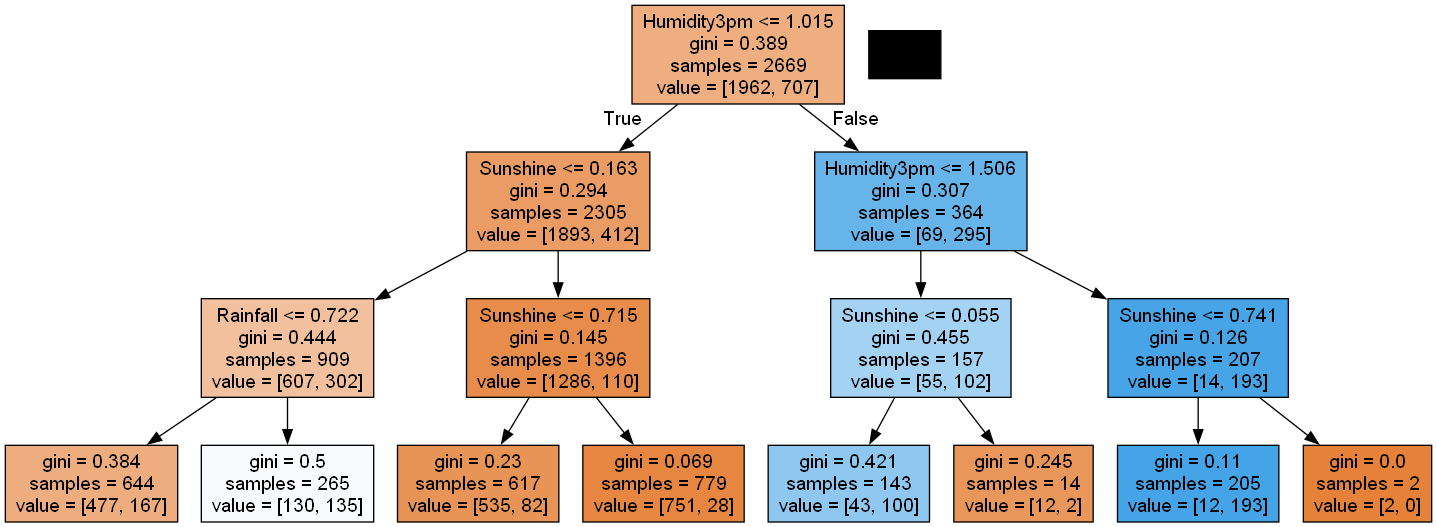

In [410]:
# Generate the graph from the dot data using pydotplus
clf_graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph as a PNG image using IPython's Image class
Image(clf_graph.create_png())

In [411]:
# Predict the target variable for the train and test dataset for classification dicison tree
clftree_y_train_pred = clftree.predict(x_train_scaler)
clftree_y_test_pred = clftree.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m clftree_y_train_pred \033[0m"), "\n", clftree_y_train_pred, "\n")
print(("\033[1m clftree_y_test_pred \033[0m"), "\n", clftree_y_test_pred, "\n")

 clftree_y_train_pred  
 [0. 0. 0. ... 1. 0. 0.] 

 clftree_y_test_pred  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 

##### 3.12.2 Performance evaluation for Classification Decision Tree
##### 3.12.2.1 Calculation of MSE for train and test dataset 

In [412]:
# Calculate mean squared error for training dataset of classification dicision tree
clftree_train_mse = mean_squared_error(y_train, clftree_y_train_pred)

# Print "MSE" of train dataset of classification dicision tree
print(clftree_train_mse) 

0.1738478831022855


In [413]:
# Calculate mean squared error for testing dataset of classification dicision tree
clftree_test_mse = mean_squared_error(y_test, clftree_y_test_pred)

# Print "MSE" of test dataset of classification dicision tree
print(clftree_test_mse) 

0.18862275449101795


##### 3.12.2.2 Calculation of MAE for train and test dataset 

In [414]:
# Calculate mean absolute error for training dataset of classification dicision tree
clftree_train_mae = mean_absolute_error(y_train, clftree_y_train_pred)

# Print "MAE" of train dataset of classification dicision tree
print(clftree_train_mae)

0.1738478831022855


In [415]:
# Calculate mean absolute error for testing dataset of classification dicision tree
clftree_test_mae = mean_absolute_error(y_test, clftree_y_test_pred)

# Print "MAE" of test dataset of classification dicision tree
print(clftree_test_mae)

0.18862275449101795


##### 3.12.2.4 Calculation of accuracy score for train and test dataset 

In [416]:
# accuracy score calculation for the train dataset's for actual values (y_train) and predicted values (clftree_y_train_pred)
clftree_train_acc_score = accuracy_score(y_train, clftree_y_train_pred)

# Print accuracy score of train dataset of classification dicision tree
print(clftree_train_acc_score)

0.8261521168977145


In [417]:
# accuracy score calculation for the test dataset's for actual values (y_test) and predicted values (clftree_y_test_pred)
clftree_test_acc_score = accuracy_score(y_test, clftree_y_test_pred)

# Print accuracy score of test dataset of classification dicision tree
print(clftree_test_acc_score)

0.811377245508982


##### 3.12.2.4 Checking for overfitting and underfitting 

In [418]:
# Check for overfitting
if clftree_train_acc_score > clftree_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Classification Decision Tree' trained model is overfitting.")
elif clftree_train_acc_score < clftree_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Classification Decision Tree' trained model is underfitting.")
else:
    print("The 'Classification Decision Tree' trained model is Well-fitted.")

The 'Classification Decision Tree' trained model is Well-fitted.


### Comparision of machine learning models used to train model for predicting salary

In [419]:
# Function to determine fitting status
def determine_fitting_status(train_r2, test_r2, threshold=0.15):
    if train_r2 > test_r2 + threshold:
        return "Overfitting"
    elif train_r2 < test_r2 - threshold:
        return "Underfitting"
    else:
        return "Well-fitted"

# Data for the table
data = {
    "Model": ["Logistic Regression", "Linear Discriminant Analysis", "K-Nearest Neighbors", "GS for K-Nearest Neighbors",
              "Bagging", "Random Forest", "GS for Random Forest", "Gradient Boosting", "Ada boost", "XG Boost",
              "GS for XG Boost", "Classification Decision Tree"],
    
    "MSE_of_training": [LR_train_mse, LDA_train_mse, KNN_train_mse, KNN_best_train_mse, Bagging_train_mse, 
                        RF_train_mse, GS_RF_train_mse, GB_train_mse, Ada_train_mse, Xgb_train_mse, GS_Xgb_train_mse,
                        clftree_train_mse],
    
    "MSE_of_testing": [LR_test_mse, LDA_test_mse, KNN_test_mse, KNN_best_train_mse, Bagging_test_mse, 
                       RF_test_mse, GS_RF_test_mse, GB_test_mse, Ada_test_mse, Xgb_test_mse, GS_Xgb_test_mse,
                       clftree_test_mse],
    
    "MAE_of_training": [LR_train_mae, LDA_train_mae, KNN_train_mae, KNN_best_train_mae, Bagging_train_mae, 
                        RF_train_mae, GS_RF_train_mae, GB_train_mae, Ada_train_mae, Xgb_train_mae, GS_Xgb_train_mae,
                        clftree_train_mae],
    
    "MAE_of_testing": [LR_test_mae, LDA_test_mae, KNN_best_test_mae, KNN_best_test_mae, Bagging_test_mae, 
                       RF_test_mae, GS_RF_test_mae, GB_test_mae, Ada_test_mae, Xgb_test_mae, GS_Xgb_test_mae,
                       clftree_test_mse],
    
    "accuracy_score_training": [LR_train_acc_score, LDA_train_acc_score, KNN_train_acc_score, KNN_best_train_acc_score,
                                Bagging_train_acc_score, RF_train_acc_score, GS_RF_train_acc_score, GB_train_acc_score,
                                Ada_train_acc_score, Xgb_train_acc_score, GS_Xgb_train_acc_score, clftree_train_acc_score],
    
    "accuracy_score_testing": [LR_test_acc_score, LDA_test_acc_score, KNN_test_acc_score, KNN_best_test_acc_score,
                                Bagging_test_acc_score, RF_test_acc_score, GS_RF_test_acc_score, GB_test_acc_score, 
                               Ada_test_acc_score, Xgb_test_acc_score, GS_Xgb_test_acc_score, clftree_test_acc_score]}

# Calculate accuracy_score differences
data["accuracy_score_difference"] = [abs(train-test) for train, test in zip(data["accuracy_score_training"],
                                                                            data["accuracy_score_testing"])]

# Determine fitting status for each model
fitting_status = [determine_fitting_status(train_r2, test_r2) for train_r2, test_r2 in zip(data["accuracy_score_training"], 
                                                                                           data["accuracy_score_testing"])]

# Add fitting status to data
data["Fitting_Status"] = fitting_status

df = pd.DataFrame(data)  # Create DataFrame
print(df) # Display the table

                           Model  MSE_of_training  MSE_of_testing  \
0            Logistic Regression         0.163357        0.170659   
1   Linear Discriminant Analysis         0.168977        0.163174   
2            K-Nearest Neighbors         0.153990        0.153990   
3     GS for K-Nearest Neighbors         0.155489        0.155489   
4                        Bagging         0.000000        0.179641   
5                  Random Forest         0.000000        0.161677   
6           GS for Random Forest         0.042338        0.172156   
7              Gradient Boosting         0.117647        0.160180   
8                      Ada boost         0.153616        0.157186   
9                       XG Boost         0.000000        0.161677   
10               GS for XG Boost         0.001499        0.167665   
11  Classification Decision Tree         0.173848        0.188623   

    MAE_of_training  MAE_of_testing  accuracy_score_training  \
0          0.163357        0.170659   

## 4. Which model’s performance is best and what could be the possible reason for that?

In [420]:
# Find the row with the minimum accuracy score difference
min_r2_diff_index = df["accuracy_score_difference"].idxmin()
min_r2_diff_row = df.loc[min_r2_diff_index]

# Display the entire row with minimum accuracy score difference
print(min_r2_diff_row)

Model                          Ada boost
MSE_of_training                 0.153616
MSE_of_testing                  0.157186
MAE_of_training                 0.153616
MAE_of_testing                  0.157186
accuracy_score_training         0.846384
accuracy_score_testing          0.842814
accuracy_score_difference        0.00357
Fitting_Status               Well-fitted
Name: 8, dtype: object


After evaluating twelve possible classification models, the **Ada boost** showed the best performance as its accuracy score difference value is less in compare to other eleven possible classification models.

- Ada Boost is an advanced ensemble techniques based on maximum liklihood model, which tends to perform well in categorical data type target variable.

- Ada Boost method looks for the parameters according to the Raindata for sydney, at which it provide best fit and gives less accuracy score difference between train and test data.

- By combining weak classifiers, AdaBoost significantly improves prediction accuracy compared to using a single classifier.

- AdaBoost tends to be less prone to overfitting than other ensemble methods, especially when used with low-complexity weak classifiers.

## 5. What steps can you take to improve this selected model’s performance even further?
**5.1 Hyperparameter Tuning:-** Perform grid search or randomized search to fine-tune hyperparameters like the number of estimators, maximum depth, minimum samples split, etc., of the Random Forest Classifier.

&rightarrow; Performed grid-search above for Random Forest classifier **(refer to 3.7)**

**5.2 Ensemble Methods:-** Explore ensemble methods like Gradient Boosting classifier models to further improve performance.

&rightarrow; Performed ensemble methods above like Gradient Boosting classifier **(refer to 3.8)**

**5.3 Decision Tree:-** Analyse the prediction with the decision tree as it more closely mirrors human decision-making than other classifier **(refer to 3.12)**

**5.4 Advanced Techniques:-** Analyse with advanced techniques like ADABoost, and XGBoost to see if they can achieve better performance.

&rightarrow; Performed advanced techniques like ADABoost **(refer to 3.9)**, and XGBoost **(refer to 3.10)**

**Data Augmentation:-** If applicable and required, augment the dataset with additional data or synthetically generated data to increase the model's training data and improve its performance.

In [421]:
# End time
end_time = time.time()

# Calculate and print execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")  # ptint execution time in second

Execution time: 686.4435641765594 seconds
